# TEIL A (PROJEKTPARTNER)

## Beste und schlechteste produkte

In [ ]:
import numpy as np
from datetime import datetime
import pandas as pd

# CSV laden
file_path = 'elektronik_data.csv'
data = pd.read_csv(file_path)

# Zusammenfassung anschauen, Struktur verstehen
data.head()


# Daten zusammenfassen, um den Gesamtumsatz (Anzahl) und den Umsatz (Umsatz = Anzahl * Preis) nach Produkttyp zu erhalten
data['Umsatz'] = data['Anzahl'] * data['Preis']

# Nach „Produktart“ gruppieren und aggregieren, um die Gesamtanzahl und den Gesamtumsatz für jedes Produkt zu erhalten.
product_summary = data.groupby('Produktart').agg(
    Anzahl_total=('Anzahl', 'sum'),
    Umsatz_total=('Umsatz', 'sum')
).reset_index()

# Nach den Top- und Bottom-up-10-Produkten sortieren sowie nach „Anzahl_total“ und „Umsatz_total“.
top_10_sales = product_summary.nlargest(10, 'Anzahl_total')
bottom_10_sales = product_summary.nsmallest(10, 'Anzahl_total')
top_10_revenue = product_summary.nlargest(10, 'Umsatz_total')
bottom_10_revenue = product_summary.nsmallest(10, 'Umsatz_total')

# Ergebnisse in eine neue Excel-Datei schreiben
with pd.ExcelWriter('beste_schlechteste_produkte_auswertung_2.xlsx') as writer:
    top_10_sales.to_excel(writer, sheet_name='Top 10 Anzahl', index=False)
    bottom_10_sales.to_excel(writer, sheet_name='Bottom 10 Anzahl', index=False)
    top_10_revenue.to_excel(writer, sheet_name='Top 10 Umsatz', index=False)
    bottom_10_revenue.to_excel(writer, sheet_name='Bottom 10 Umsatz', index=False)

'beste_schlechteste_produkte_auswertung_2.xlsx'

# Das Ergebnis in eine Excel-Datei speichern
output_path = 'geschlecht_online_offline_auswertung_2.xlsx'

## Kunden_Kaufdaten

In [ ]:
import pandas as pd

# CSV-Datei laden
data = pd.read_csv('elektronik_data.csv')

# Durchschnittliche Anzahl der Produkte berechnen, die pro Kunden_ID am selben Kaufdatum gekauft wurden
average_products_per_purchase = data.groupby(['Kunden_ID', 'Kaufdatum'])['Anzahl'].sum().mean()

# Füge eine Spalte für den Umsatz hinzu (Anzahl * Preis)
data['Umsatz'] = data['Anzahl'] * data['Preis']

# Durchschnittlichen Warenkorbwert berechnen (Summe des Umsatzes pro Kunden_ID am selben Kaufdatum)
average_basket_value = data.groupby(['Kunden_ID', 'Kaufdatum'])['Umsatz'].sum().mean()

# Speichere die Ergebnisse in eine Excel-Datei
output_path = 'output_auswertung.xlsx'
with pd.ExcelWriter(output_path) as writer:
    # Durchschnittliche Anzahl der Produkte als separate Tabelle
    pd.DataFrame({'Durchschnittliche Anzahl Produkte': [average_products_per_purchase]}).to_excel(writer, sheet_name='Durchschnitt Produkte', index=False)
    
    # Durchschnittlichen Warenkorbwert als separate Tabelle
    pd.DataFrame({'Durchschnittlicher Warenkorbwert': [average_basket_value]}).to_excel(writer, sheet_name='Durchschnitt Warenkorbwert', index=False)

print(f"Auswertung erfolgreich erstellt und als '{output_path}' gespeichert.")

## Daten für Präsentation

In [ ]:
import numpy as np
from datetime import datetime
import pandas as pd

# CSV laden
file_path = 'elektronik_data.csv'
data = pd.read_csv(file_path)

# Zusammenfassung anschauen, Struktur verstehen
data.head(), data.info()


# Schritt 1: Datenvorverarbeitung - Konvertieren von Datums- und relevanten Spalten in entsprechende Datentypen
data['Kaufdatum'] = pd.to_datetime(data['Kaufdatum'], errors='coerce')
data['Monat'] = data['Kaufdatum'].dt.to_period("M")  # Extrahieren von Monat und Jahr für eine zeitbasierte Analyse

# Schritt 2: Analysen erstellen

# 1a. Rabattnutzungen pro Monat
rabattnutzung_monat = data[data['Rabattnutzung'] == 'Ja'].groupby('Monat').size()
rabattnutzung_monat_prozent = rabattnutzung_monat / rabattnutzung_monat.sum() * 100

# 1b. Summe des Rabatts (Anzahl der Rabatte und den "verlorenen" Umsatz)
data['Gesamtpreis'] = data['Anzahl'] * data['Preis']
rabatt_sum = data[data['Rabattnutzung'] == 'Ja']['Gesamtpreis'].sum()
total_sum = data['Gesamtpreis'].sum()
rabatt_verlust_prozent = rabatt_sum / total_sum * 100

# 2. Umsatz pro Wohnort
umsatz_wohnort = data.groupby('Wohnort')['Gesamtpreis'].sum()

# 3. Anzahl Offline vs. Online Käufe pro Wohnort
wohnort_kanal_kauf = data.groupby(['Wohnort', 'Kanalpräferenz']).size().unstack(fill_value=0)

# 4. Umsatzverteilung männlich/weiblich
umsatz_geschlecht = data.groupby('Geschlecht')['Gesamtpreis'].sum()

# 5. Beliebteste Produkte
beliebteste_produkte = data['Produktart'].value_counts().nlargest(10)

# 6. Unbeliebteste Produkte
unbeliebteste_produkte = data['Produktart'].value_counts().nsmallest(10)

# 7. Altersverteilung Online zu Offline Käufe
alter_kanal_verteilung = data.groupby(['Alter', 'Kanalpräferenz']).size().unstack(fill_value=0)

# 8. Altersverteilung Umsatz - Wer bringt mehr Umsatz?
alter_umsatz = data.groupby('Alter')['Gesamtpreis'].sum()

# 9. Wiederkehrende vs. einmalige Kunden
kunden_kaufverhalten = data.groupby('Kunden_ID').size().value_counts().sort_index()

# Schritt 3: Anzahl der Kunden mit unterschiedlicher Kaufhäufigkeit basierend auf einzigartigen Kaufdaten

# Extrahieren der eindeutigen Kaufdaten pro Kunden_ID, um eindeutige Kaufdaten zu finden
customer_purchase_dates = data.groupby(['Kunden_ID', 'Kaufdatum']).size().reset_index().groupby('Kunden_ID').size()

# Zählen der Kunden anhand der Anzahl eindeutiger Kaufdaten
purchase_frequency_counts = customer_purchase_dates.value_counts().sort_index()

# Schritt 4: Top 10 Kunden mit mehr als 7 Käufen an unterschiedlichen Tagen

# Filtern der Kunden, die an mehr als 7 einzelnen Tagen eingekauft haben
top_customers = customer_purchase_dates[customer_purchase_dates > 7].nlargest(10)

# Relevante Transaktionen (Rechnung_ID und Kunden_ID) für diese Top-Kunden
top_customers_transactions = data[data['Kunden_ID'].isin(top_customers.index)][['Rechnung_ID', 'Kunden_ID', 'Kaufdatum']]



# Schritt  5: Alle Analysen in Excel speichern
output_file = 'analysen_uebersicht_ppt.xlsx'
with pd.ExcelWriter(output_file) as writer:
    rabattnutzung_monat.to_frame('Rabattnutzungen').to_excel(writer, sheet_name='1a_Rabattnutzungen_Monat')
    rabattnutzung_monat_prozent.to_frame('Rabattnutzungen (%)').to_excel(writer, sheet_name='1a_Rabattnutzungen_Prozent')
    
    pd.DataFrame({'Rabattverlust': [rabatt_sum], 'Gesamtumsatz': [total_sum], 'Rabattverlust (%)': [rabatt_verlust_prozent]}).to_excel(writer, sheet_name='1b_Rabatt_Effekte')
    
    umsatz_wohnort.to_frame('Umsatz pro Wohnort').to_excel(writer, sheet_name='2_Umsatz_Wohnort')
    wohnort_kanal_kauf.to_excel(writer, sheet_name='3_Offline_vs_Online')
    
    umsatz_geschlecht.to_frame('Umsatz nach Geschlecht').to_excel(writer, sheet_name='4_Umsatz_Geschlecht')
    beliebteste_produkte.to_frame('Beliebteste Produkte').to_excel(writer, sheet_name='5_Beliebteste_Produkte')
    unbeliebteste_produkte.to_frame('Unbeliebteste Produkte').to_excel(writer, sheet_name='6_Unbeliebteste_Produkte')
    
    alter_kanal_verteilung.to_excel(writer, sheet_name='7_Altersverteilung_Kanäle')
    alter_umsatz.to_frame('Umsatz nach Alter').to_excel(writer, sheet_name='8_Umsatz_Alter')
    
    kunden_kaufverhalten.to_frame('Kaufverhalten Kunden').to_excel(writer, sheet_name='9_Wiederkehr_vs_Einmalig')

    purchase_frequency_counts.to_frame('Anzahl Kunden').to_excel(writer, sheet_name='10_Kunden_Kaufhäufigkeit')

    top_customers.to_frame('Anzahl der unterschiedlichen Tage').to_excel(writer, sheet_name='11_Top10_Kunden')

output_file


In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

# TEIL B (EMRAH)

### Data Overview

In [4]:
# Bibliotheken laden:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [3]:
# Ausführen, für den Fall, dass  Warnungen ignoriert werden sollen
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Datenbank laden:
elektro_df = pd.read_csv('elektronik_data.csv')

In [7]:
# Datum formatieren:
elektro_df['Kaufdatum'] = pd.to_datetime(elektro_df['Kaufdatum'], format='%Y-%m-%d')

In [9]:
# Umbenennen von Feature 'Kanalpräferenz' in 'Kanalnutzung'
elektro_df = elektro_df.rename(columns={'Kanalpräferenz' : 'Kanalwahl'})

In [11]:
elektro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34379 entries, 0 to 34378
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Rechnung_ID        34379 non-null  object        
 1   Produktart         34379 non-null  object        
 2   Produkthersteller  32777 non-null  object        
 3   Kaufdatum          34379 non-null  datetime64[ns]
 4   Anzahl             34379 non-null  int64         
 5   Preis              34379 non-null  float64       
 6   Kunden_ID          34379 non-null  int64         
 7   Alter              34379 non-null  int64         
 8   Geschlecht         34379 non-null  object        
 9   Wohnort            34379 non-null  object        
 10  Kanalwahl          34379 non-null  object        
 11  Rabattnutzung      34379 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 3.1+ MB


In [13]:
elektro_df.nunique()

Rechnung_ID          15103
Produktart              33
Produkthersteller       45
Kaufdatum              366
Anzahl                   3
Preis                14853
Kunden_ID             7727
Alter                   56
Geschlecht               2
Wohnort                 93
Kanalwahl                3
Rabattnutzung            2
dtype: int64

In [15]:
elektro_df.describe()

,Kaufdatum,Anzahl,Preis,Kunden_ID,Alter
count,34379,34379.000000,34379.000000,34379.000000,34379.000000
mean,2016-07-04 12:48:18.932488192,1.087670,586.356181,5483.155211,41.811891
min,2016-01-01 00:00:00,1.000000,1.990000,1000.000000,14.000000
25%,2016-04-02 00:00:00,1.000000,89.490000,3208.500000,29.000000
50%,2016-07-03 00:00:00,1.000000,333.590000,5471.000000,42.000000
75%,2016-10-08 00:00:00,1.000000,752.045000,7758.000000,54.000000
max,2016-12-31 00:00:00,3.000000,19908.000000,9999.000000,69.000000
std,NaN,0.294705,843.809752,2607.615156,15.045169


In [17]:
elektro_df.describe(include=['O'])

,Rechnung_ID,Produktart,Produkthersteller,Geschlecht,Wohnort,Kanalwahl,Rabattnutzung
count,34379,34379,32777,34379,34379,34379,34379
unique,15103,33,45,2,93,3,2
top,R21120000,Tablet,Philips,Weiblich,Wunstorf,Online_App,Nein
freq,8,2547,3089,17238,707,13644,20355


In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

## Verteilungsplots Produkt-Preise

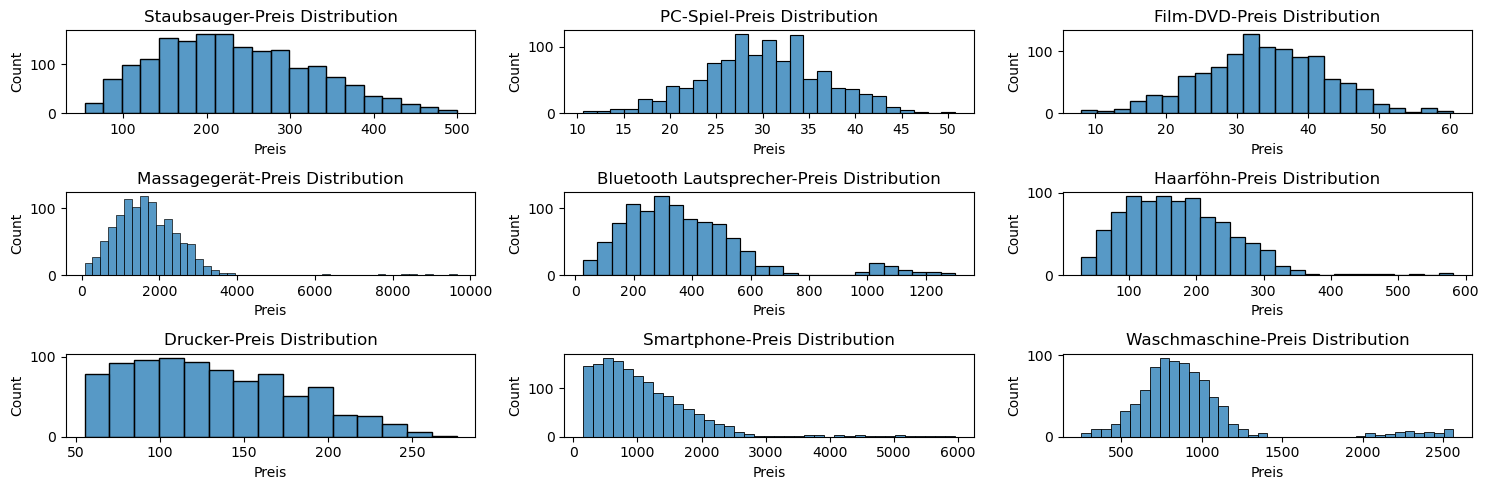

In [23]:
plt.figure(figsize=(15, 5))

plt.subplot(3,3,1)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Staubsauger'], x='Preis')
plt.title('Staubsauger-Preis Distribution')

plt.subplot(3,3,2)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'PC-Spiel'], x='Preis')
plt.title('PC-Spiel-Preis Distribution')

plt.subplot(3,3,3)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Film-DVD'], x='Preis')
plt.title('Film-DVD-Preis Distribution')

plt.subplot(3,3,4)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Massagegerät'], x='Preis')
plt.title('Massagegerät-Preis Distribution')

plt.subplot(3,3,5)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Bluetooth Lautsprecher'], x='Preis')
plt.title('Bluetooth Lautsprecher-Preis Distribution')

plt.subplot(3,3,6)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Haarföhn'], x='Preis')
plt.title('Haarföhn-Preis Distribution')

plt.subplot(3,3,7)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Drucker'], x='Preis')
plt.title('Drucker-Preis Distribution')

plt.subplot(3,3,8)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Smartphone'], x='Preis')
plt.title('Smartphone-Preis Distribution')

plt.subplot(3,3,9)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Waschmaschine'], x='Preis')
plt.title('Waschmaschine-Preis Distribution')

plt.tight_layout()
plt.show()

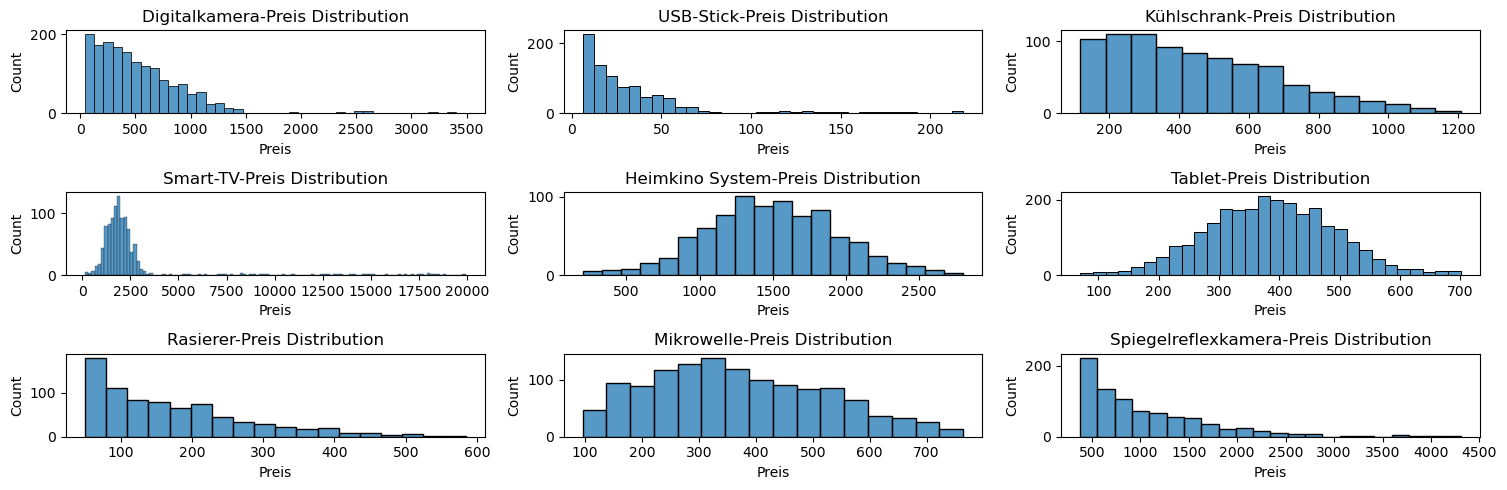

In [25]:
plt.figure(figsize=(15, 5))

plt.subplot(3,3,1)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Digitalkamera'], x='Preis')
plt.title('Digitalkamera-Preis Distribution')

plt.subplot(3,3,2)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'USB-Stick'], x='Preis')
plt.title('USB-Stick-Preis Distribution')

plt.subplot(3,3,3)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Kühlschrank'], x='Preis')
plt.title('Kühlschrank-Preis Distribution')

plt.subplot(3,3,4)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Smart-TV'], x='Preis')
plt.title('Smart-TV-Preis Distribution')

plt.subplot(3,3,5)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Heimkino System'], x='Preis')
plt.title('Heimkino System-Preis Distribution')

plt.subplot(3,3,6)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Tablet'], x='Preis')
plt.title('Tablet-Preis Distribution')

plt.subplot(3,3,7)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Rasierer'], x='Preis')
plt.title('Rasierer-Preis Distribution')

plt.subplot(3,3,8)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Mikrowelle'], x='Preis')
plt.title('Mikrowelle-Preis Distribution')

plt.subplot(3,3,9)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Spiegelreflexkamera'], x='Preis')
plt.title('Spiegelreflexkamera-Preis Distribution')

plt.tight_layout()
plt.show()

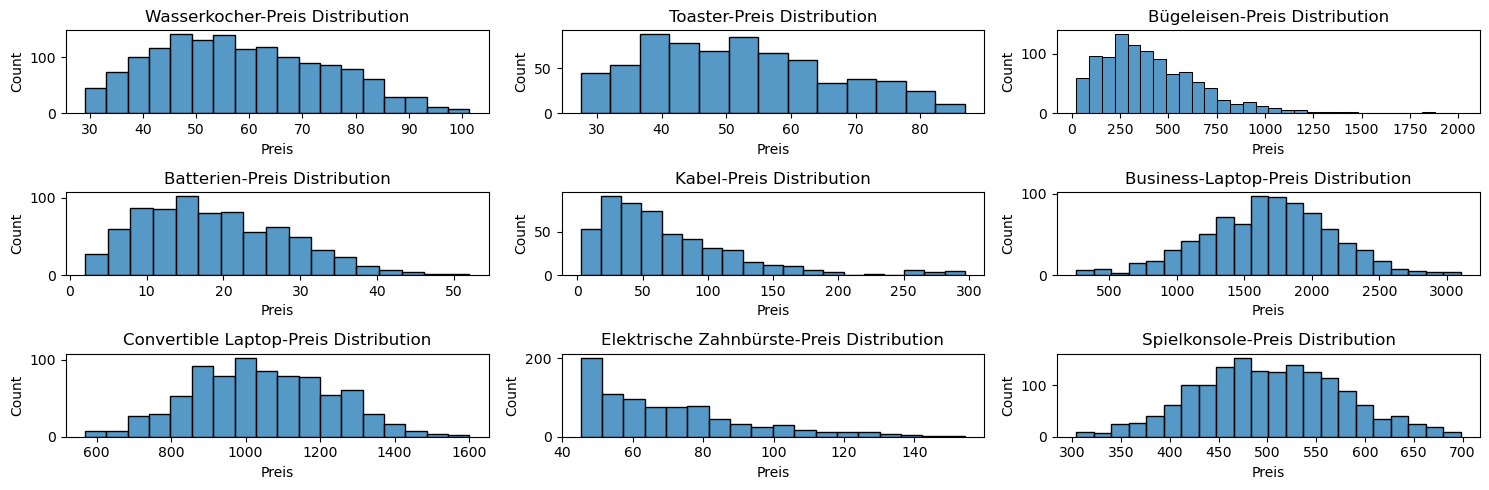

In [27]:
plt.figure(figsize=(15, 5))

plt.subplot(3,3,1)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Wasserkocher'], x='Preis')
plt.title('Wasserkocher-Preis Distribution')

plt.subplot(3,3,2)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Toaster'], x='Preis')
plt.title('Toaster-Preis Distribution')

plt.subplot(3,3,3)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Bügeleisen'], x='Preis')
plt.title('Bügeleisen-Preis Distribution')

plt.subplot(3,3,4)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Batterien'], x='Preis')
plt.title('Batterien-Preis Distribution')

plt.subplot(3,3,5)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Kabel'], x='Preis')
plt.title('Kabel-Preis Distribution')

plt.subplot(3,3,6)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Business-Laptop'], x='Preis')
plt.title('Business-Laptop-Preis Distribution')

plt.subplot(3,3,7)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Convertible Laptop'], x='Preis')
plt.title('Convertible Laptop-Preis Distribution')

plt.subplot(3,3,8)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Elektrische Zahnbürste'], x='Preis')
plt.title('Elektrische Zahnbürste-Preis Distribution')

plt.subplot(3,3,9)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Spielkonsole'], x='Preis')
plt.title('Spielkonsole-Preis Distribution')

plt.tight_layout()
plt.show()

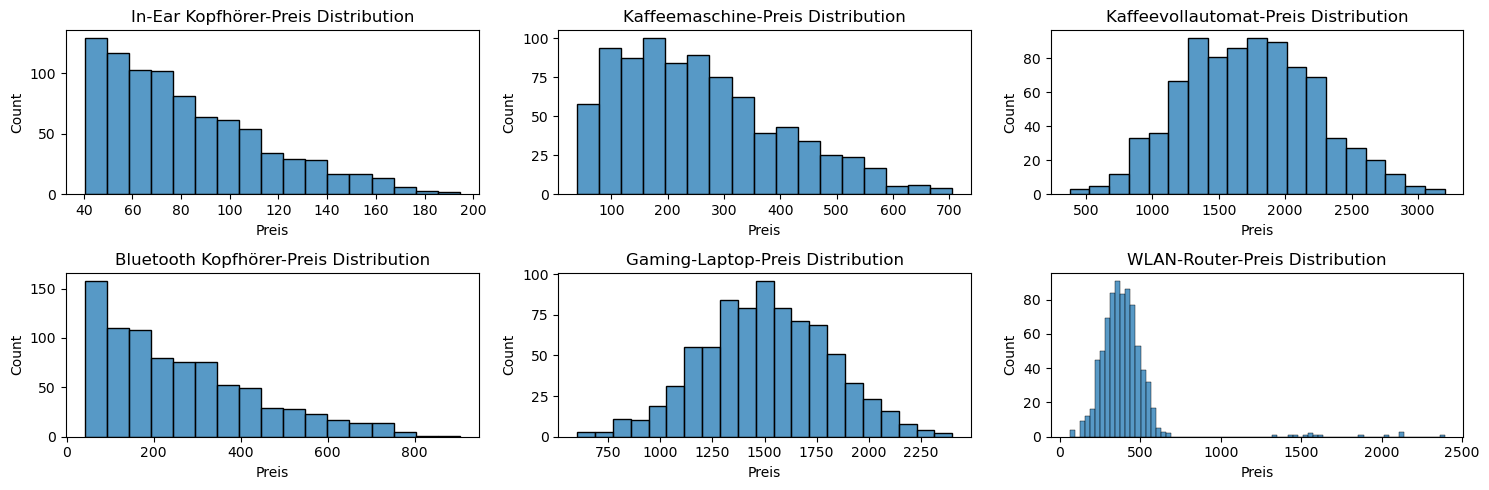

In [29]:
plt.figure(figsize=(15, 5))

plt.subplot(2,3,1)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'In-Ear Kopfhörer'], x='Preis')
plt.title('In-Ear Kopfhörer-Preis Distribution')

plt.subplot(2,3,2)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Kaffeemaschine'], x='Preis')
plt.title('Kaffeemaschine-Preis Distribution')

plt.subplot(2,3,3)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Kaffeevollautomat'], x='Preis')
plt.title('Kaffeevollautomat-Preis Distribution')

plt.subplot(2,3,4)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Bluetooth Kopfhörer'], x='Preis')
plt.title('Bluetooth Kopfhörer-Preis Distribution')

plt.subplot(2,3,5)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'Gaming-Laptop'], x='Preis')
plt.title('Gaming-Laptop-Preis Distribution')

plt.subplot(2,3,6)
sns.histplot(elektro_df[elektro_df['Produktart'] == 'WLAN-Router'], x='Preis')
plt.title('WLAN-Router-Preis Distribution')

plt.tight_layout()
plt.show()

## Altersverteilung Overview

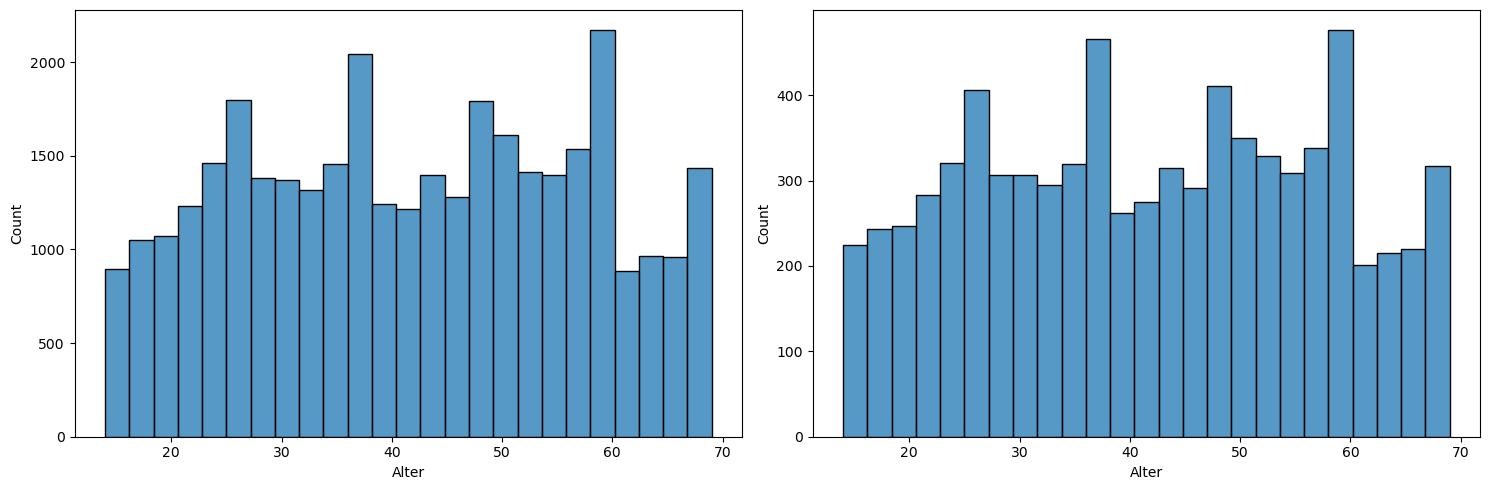

In [19]:
elektro_df_drop = elektro_df.drop_duplicates(subset='Kunden_ID')

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=elektro_df, x='Alter', bins=25)

plt.subplot(1,2,2)
sns.histplot(data=elektro_df_drop, x='Alter', bins=25)

plt.tight_layout()
plt.show()

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

## VORBEREITUNGEN FÜR DEN KMEANS ALGORITHMUS

In [21]:
# Feature Umsatz dataframe anfügen:
elektro_df['Umsatz'] = elektro_df['Preis'] * elektro_df['Anzahl']

In [23]:
elektro_df

,Rechnung_ID,Produktart,Produkthersteller,Kaufdatum,Anzahl,Preis,Kunden_ID,Alter,Geschlecht,Wohnort,Kanalwahl,Rabattnutzung,Umsatz
0,R10000000,Smartphone,Apple,2016-09-22,1,1163.19,1000,48,Männlich,Bockenem,Online_App,Ja,1163.19
1,R10000001,Kühlschrank,Bosch,2016-08-24,1,429.49,1000,48,Männlich,Bockenem,Online_App,Ja,429.49
2,R10000003,Kühlschrank,LG,2016-05-10,1,413.19,1000,48,Männlich,Bockenem,Store,Ja,413.19
3,R10000002,Drucker,HP,2016-12-11,1,79.74,1000,48,Männlich,Bockenem,Online_App,Nein,79.74
4,R10000003,Spiegelreflexkamera,Canon,2016-05-10,1,426.79,1000,48,Männlich,Bockenem,Store,Nein,426.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34374,R99970002,Spielkonsole,Microsoft,2016-05-25,1,392.00,9997,41,Männlich,Nörten-Hardenberg,Store,Ja,392.00
34375,R99970002,PC-Spiel,Microsoft,2016-05-25,2,33.00,9997,41,Männlich,Nörten-Hardenberg,Store,Nein,66.00
34376,R99970001,Bluetooth Lautsprecher,Sony,2016-05-14,1,357.69,9997,41,Männlich,Nörten-Hardenberg,Online_App,Ja,357.69
34377,R99990002,Rasierer,Philips,2016-10-23,1,207.89,9999,16,Weiblich,Hattorf am Harz,Online_App,Nein,207.89


In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

## Feature Engineering

In [25]:
aggregated_elektro_df = elektro_df.groupby(by="Kunden_ID", as_index=False) \
    .agg(
        Monetary_Value=("Umsatz", "sum"),
        Frequency=("Rechnung_ID", "nunique"),
        Letztes_Kaufdatum=("Kaufdatum", "max")
    )

aggregated_elektro_df.head(5)

,Kunden_ID,Monetary_Value,Frequency,Letztes_Kaufdatum
0,1000,2512.40,4,2016-12-11
1,1001,1160.83,2,2016-04-04
2,1002,2363.19,1,2016-05-09
3,1003,3846.55,3,2016-03-22
4,1004,2869.87,1,2016-10-11


In [27]:
# Für Recency wird angenommen, dass 'max_rechnung_datum' die Grundlage bildet:
max_rechnung_datum = aggregated_elektro_df["Letztes_Kaufdatum"].max()

aggregated_elektro_df["Recency"] = (max_rechnung_datum - aggregated_elektro_df["Letztes_Kaufdatum"]).dt.days

aggregated_elektro_df.head(5)

,Kunden_ID,Monetary_Value,Frequency,Letztes_Kaufdatum,Recency
0,1000,2512.40,4,2016-12-11,20
1,1001,1160.83,2,2016-04-04,271
2,1002,2363.19,1,2016-05-09,236
3,1003,3846.55,3,2016-03-22,284
4,1004,2869.87,1,2016-10-11,81


#### Boxplots für R, F, M

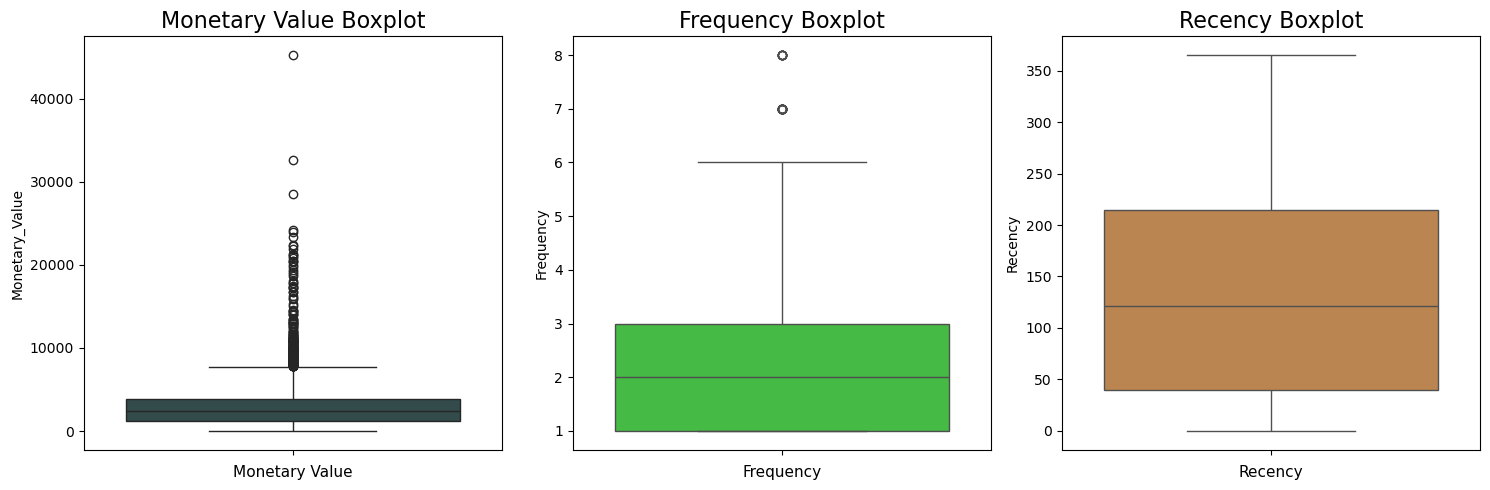

In [29]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_elektro_df['Monetary_Value'], color='darkslategrey')
plt.title('Monetary Value Boxplot', fontsize=16)
plt.xlabel('Monetary Value', fontsize=11)

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_elektro_df['Frequency'], color='limegreen')
plt.title('Frequency Boxplot', fontsize=16)
plt.xlabel('Frequency', fontsize=11)

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_elektro_df['Recency'], color='peru')
plt.title('Recency Boxplot', fontsize=16)
plt.xlabel('Recency', fontsize=11)

plt.tight_layout()
plt.show()

#### Boxplot: Nur für M

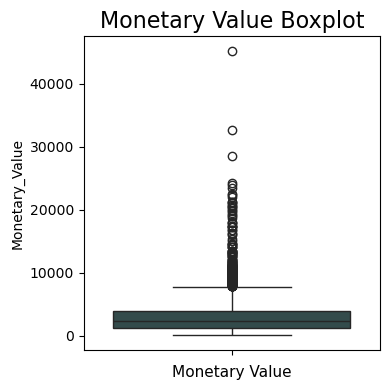

In [31]:
plt.figure(figsize=(4, 4))

sns.boxplot(data=aggregated_elektro_df['Monetary_Value'], color='darkslategrey')
plt.title('Monetary Value Boxplot', fontsize=16)
plt.xlabel('Monetary Value', fontsize=11)

plt.tight_layout()
#plt.savefig('ausreisser_m.png')
plt.show()

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

## AUSREISSER ANALYSE MITTELS IQR-METHODE

### Für Monetary Value

In [33]:
M_Q1 = aggregated_elektro_df["Monetary_Value"].quantile(0.25)
M_Q3 = aggregated_elektro_df["Monetary_Value"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

m_ausreisser_df = aggregated_elektro_df[(aggregated_elektro_df["Monetary_Value"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_elektro_df["Monetary_Value"] < (M_Q1 - 1.5 * M_IQR))].copy()

m_ausreisser_df.describe()

,Kunden_ID,Monetary_Value,Frequency,Letztes_Kaufdatum,Recency
count,252.000000,252.000000,252.000000,252,252.000000
mean,5759.075397,11203.879008,2.801587,2016-09-15 10:00:00,106.583333
min,1063.000000,7792.260000,1.000000,2016-01-07 00:00:00,0.000000
25%,3360.750000,8434.782500,1.000000,2016-07-09 12:00:00,28.000000
50%,5891.500000,9465.860000,3.000000,2016-10-20 00:00:00,72.000000
75%,8218.500000,11653.690000,4.000000,2016-12-03 00:00:00,174.500000
max,9995.000000,45243.850000,8.000000,2016-12-31 00:00:00,359.000000
std,2817.041978,4630.305444,1.571762,NaN,96.209624


#### Für Monetary Value wurden 252 Ausreißer identifiziert.

### Für Frequency

In [35]:
F_Q1 = aggregated_elektro_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_elektro_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

f_ausreisser_df = aggregated_elektro_df[(aggregated_elektro_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_elektro_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

f_ausreisser_df.describe()

,Kunden_ID,Monetary_Value,Frequency,Letztes_Kaufdatum,Recency
count,34.000000,34.000000,34.000000,34,34.000000
mean,5147.941176,6205.332059,7.235294,2016-11-19 09:52:56.470588160,41.588235
min,1238.000000,2037.740000,7.000000,2016-06-18 00:00:00,0.000000
25%,2651.000000,4297.357500,7.000000,2016-11-09 00:00:00,10.000000
50%,4535.500000,6073.880000,7.000000,2016-12-07 00:00:00,24.000000
75%,7759.250000,7543.305000,7.000000,2016-12-21 00:00:00,52.000000
max,9950.000000,13457.030000,8.000000,2016-12-31 00:00:00,196.000000
std,2746.783672,2975.732726,0.430562,NaN,48.782832


In [37]:
m_liste = list(m_ausreisser_df.index)

for index, item in f_ausreisser_df.iterrows():
    if index in m_liste:
        print(index)

209
557
3958
4162
5638
5811
6021


### Insgesamt sind 34 Ausreisser in F vorhanden.

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************

#### Da 7 F-Werte sowohl in M, als auch in F vorkommen, wurden diese von F entfernt. Dann würden 27 Ausreisser für F verbleiben. Mit den 252 Ausreissern in M wird der Dataframe um diese bereinigt.
- Von Ausreissern bereinigter Datensatz für CLustering-Prozess mit KMeans-Algorithmus:

In [39]:
ohne_ausreisser_elektro_df = aggregated_elektro_df[(~aggregated_elektro_df.index.isin(m_ausreisser_df.index)) & (~aggregated_elektro_df.index.isin(f_ausreisser_df.index))]

ohne_ausreisser_elektro_df.describe()

,Kunden_ID,Monetary_Value,Frequency,Letztes_Kaufdatum,Recency
count,7448.000000,7448.000000,7448.000000,7448,7448.000000
mean,5496.210929,2552.926517,1.906686,2016-08-15 18:00:00.000000256,137.250000
min,1000.000000,11.990000,1.000000,2016-01-01 00:00:00,0.000000
25%,3252.750000,1167.690000,1.000000,2016-05-28 00:00:00,41.000000
50%,5506.500000,2281.815000,2.000000,2016-08-30 00:00:00,123.000000
75%,7741.250000,3635.895000,2.000000,2016-11-20 00:00:00,217.000000
max,9999.000000,7756.240000,6.000000,2016-12-31 00:00:00,365.000000
std,2594.913547,1737.396518,1.121356,NaN,104.176587


In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************

### Elbow-Methode und Silhouette-Score in Grafik:

In [41]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(ohne_ausreisser_elektro_df[["Monetary_Value", "Frequency", "Recency"]])

scaled_data

array([[-0.02332757,  1.86689557, -1.12556838],
       [-0.80130815,  0.0832206 ,  1.28396393],
       [-0.10921471, -0.80861688,  0.94797337],
       ...,
       [ 1.40255091,  2.75873306, -1.08716946],
       [ 1.87393725,  0.97505809,  0.36238982],
       [-1.30390419,  0.0832206 , -0.6551816 ]])

In [45]:
scaled_data_df = pd.DataFrame(scaled_data, index=ohne_ausreisser_elektro_df.index, columns=("Monetary_Value", "Frequency", "Recency"))

scaled_data_df

,Monetary_Value,Frequency,Recency
0,-0.023328,1.866896,-1.125568
1,-0.801308,0.083221,1.283964
2,-0.109215,-0.808617,0.947973
3,0.744626,0.975058,1.408760
4,0.182437,-0.808617,-0.539985
...,...,...,...
7721,-0.687648,-0.808617,0.458387
7722,-0.866629,1.866896,-0.338390
7724,1.402551,2.758733,-1.087169
7725,1.873937,0.975058,0.362390


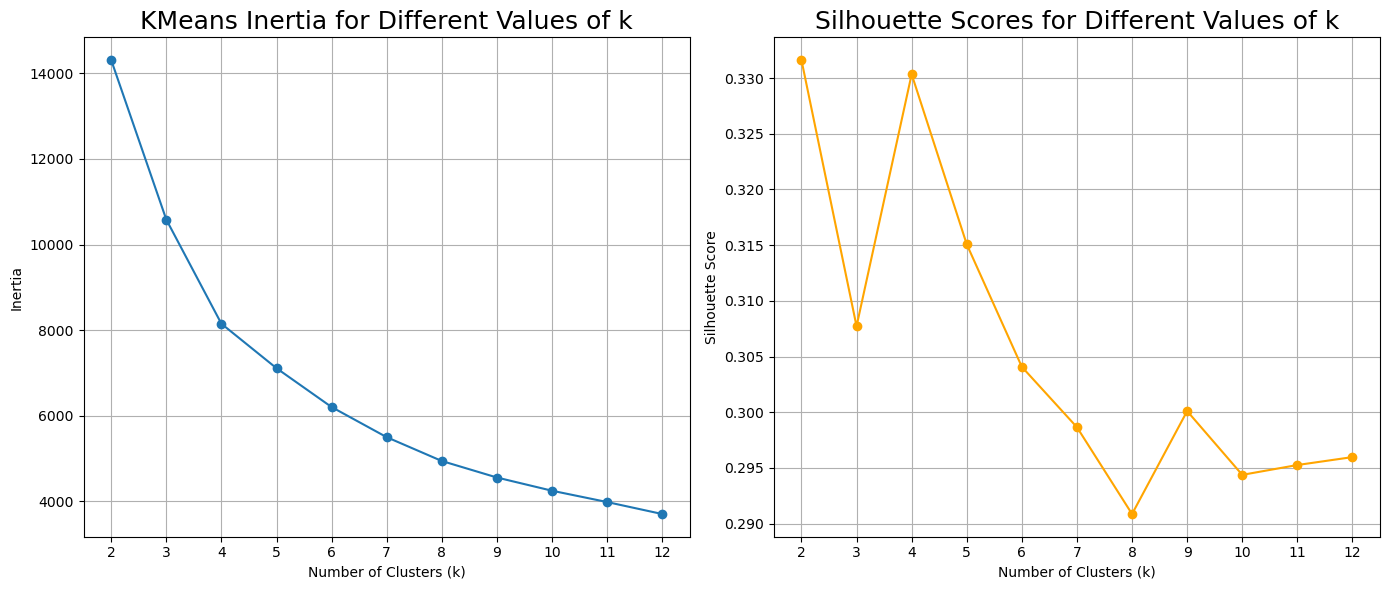

In [47]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k',fontsize=18)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k', fontsize=18)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
#plt.savefig('elbow_silhouette.png')
plt.show()

## Laut dem Elbow-Diagramm und dem Silhouette-Score Diagramm sollten wir k=4 Cluster wählen!

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************

### KMeans-Algorithmus:

In [49]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([2, 3, 3, ..., 2, 1, 0])

In [51]:
ohne_ausreisser_elektro_df["Cluster"] = cluster_labels

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************

### Gebildete Kundensegmente nach R,F,M in 3D-Scatter Plot: 

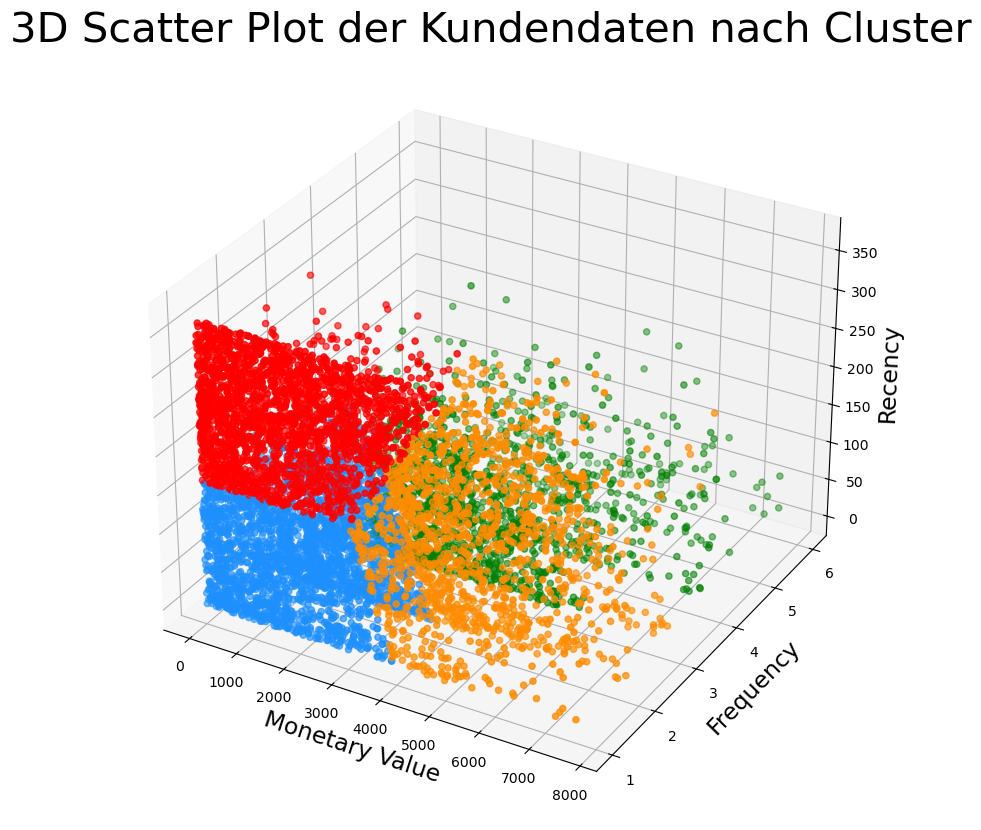

In [53]:
cluster_colors = {0: 'dodgerblue',  
                  1: 'darkorange',  
                  2: 'green', 
                  3: 'red'}  

colors = ohne_ausreisser_elektro_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(ohne_ausreisser_elektro_df['Monetary_Value'], 
                     ohne_ausreisser_elektro_df['Frequency'], 
                     ohne_ausreisser_elektro_df['Recency'], 
                     c=colors,  # Nutzen von gemappten Farben
                     marker='o')

ax.set_xlabel('Monetary Value', fontsize=17)
ax.set_ylabel('Frequency', fontsize=17)
ax.set_zlabel('Recency', fontsize=17)

ax.set_title('3D Scatter Plot der Kundendaten nach Cluster',fontsize=30)

#plt.savefig('3d_cluster.png')
plt.show()

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************

In [55]:
ohne_ausreisser_elektro_df[ohne_ausreisser_elektro_df['Cluster'] == 0].describe()

,Kunden_ID,Monetary_Value,Frequency,Letztes_Kaufdatum,Recency,Cluster
count,2500.000000,2500.000000,2500.000000,2500,2500.000000,2500.0
mean,5450.629600,1612.382280,1.541600,2016-10-19 00:44:21.120000,72.969200,0.0
min,1004.000000,11.990000,1.000000,2016-06-23 00:00:00,0.000000,0.0
25%,3209.750000,822.480000,1.000000,2016-09-03 00:00:00,25.000000,0.0
50%,5426.000000,1494.385000,1.000000,2016-10-25 00:00:00,67.000000,0.0
75%,7725.500000,2377.197500,2.000000,2016-12-06 00:00:00,119.000000,0.0
max,9999.000000,3898.760000,3.000000,2016-12-31 00:00:00,191.000000,0.0
std,2594.156998,956.008171,0.610261,NaN,51.418357,0.0


In [57]:
ohne_ausreisser_elektro_df[ohne_ausreisser_elektro_df['Cluster'] == 1].describe()

,Kunden_ID,Monetary_Value,Frequency,Letztes_Kaufdatum,Recency,Cluster
count,1323.000000,1323.000000,1323.000000,1323,1323.000000,1323.0
mean,5401.826909,4953.103621,1.752834,2016-08-16 11:58:22.040816384,136.501134,1.0
min,1003.000000,2874.190000,1.000000,2016-01-03 00:00:00,0.000000,1.0
25%,3104.000000,4020.910000,1.000000,2016-06-17 12:00:00,61.000000,1.0
50%,5345.000000,4759.770000,2.000000,2016-08-18 00:00:00,135.000000,1.0
75%,7743.500000,5755.105000,2.000000,2016-10-31 00:00:00,196.500000,1.0
max,9997.000000,7756.240000,4.000000,2016-12-31 00:00:00,363.000000,1.0
std,2648.192880,1168.354553,0.656733,NaN,87.508101,0.0


In [59]:
ohne_ausreisser_elektro_df[ohne_ausreisser_elektro_df['Cluster'] == 2].describe()

,Kunden_ID,Monetary_Value,Frequency,Letztes_Kaufdatum,Recency,Cluster
count,1430.000000,1430.000000,1430.000000,1430,1430.000000,1430.0
mean,5507.045455,3421.725972,3.765035,2016-11-01 03:22:24.335664128,59.859441,2.0
min,1000.000000,311.680000,3.000000,2016-02-16 00:00:00,0.000000,2.0
25%,3270.000000,2349.045000,3.000000,2016-09-29 00:00:00,16.000000,2.0
50%,5550.500000,3220.450000,4.000000,2016-11-20 12:00:00,40.500000,2.0
75%,7759.250000,4337.147500,4.000000,2016-12-15 00:00:00,93.000000,2.0
max,9996.000000,7729.530000,6.000000,2016-12-31 00:00:00,319.000000,2.0
std,2588.348695,1434.265192,0.852712,NaN,55.206773,0.0


In [61]:
ohne_ausreisser_elektro_df[ohne_ausreisser_elektro_df['Cluster'] == 3].describe()

,Kunden_ID,Monetary_Value,Frequency,Letztes_Kaufdatum,Recency,Cluster
count,2195.000000,2195.000000,2195.000000,2195,2195.000000,2195.0
mean,5597.955809,1611.488278,1.204556,2016-04-13 16:01:05.603644672,261.332574,3.0
min,1001.000000,15.980000,1.000000,2016-01-01 00:00:00,162.000000,3.0
25%,3458.500000,688.325000,1.000000,2016-02-25 12:00:00,213.000000,3.0
50%,5698.000000,1483.350000,1.000000,2016-04-15 00:00:00,260.000000,3.0
75%,7755.500000,2390.830000,1.000000,2016-06-01 00:00:00,309.500000,3.0
max,9992.000000,4853.790000,3.000000,2016-07-22 00:00:00,365.000000,3.0
std,2565.720723,1087.122384,0.447394,NaN,56.662072,0.0


In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************

## Um innerhalb der 4 RFM-Segmente weiter nach der Kanalpräferenz und der Rabattnutzung segmentieren zu können:
- Bilden wir zunächst Dataframes mit allen Informationen vom Originaldatensatz 'elektro_df' gemappt zu all den 4 RFM-Segmenten

In [65]:
dict_ohne_ausreisser_df = ohne_ausreisser_elektro_df.set_index('Kunden_ID')['Cluster'].to_dict()

In [67]:
elektro_df['Cluster'] = elektro_df['Kunden_ID'].map(dict_ohne_ausreisser_df)

In [69]:
elektro_df

,Rechnung_ID,Produktart,Produkthersteller,Kaufdatum,Anzahl,Preis,Kunden_ID,Alter,Geschlecht,Wohnort,Kanalwahl,Rabattnutzung,Umsatz,Cluster
0,R10000000,Smartphone,Apple,2016-09-22,1,1163.19,1000,48,Männlich,Bockenem,Online_App,Ja,1163.19,2.0
1,R10000001,Kühlschrank,Bosch,2016-08-24,1,429.49,1000,48,Männlich,Bockenem,Online_App,Ja,429.49,2.0
2,R10000003,Kühlschrank,LG,2016-05-10,1,413.19,1000,48,Männlich,Bockenem,Store,Ja,413.19,2.0
3,R10000002,Drucker,HP,2016-12-11,1,79.74,1000,48,Männlich,Bockenem,Online_App,Nein,79.74,2.0
4,R10000003,Spiegelreflexkamera,Canon,2016-05-10,1,426.79,1000,48,Männlich,Bockenem,Store,Nein,426.79,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34374,R99970002,Spielkonsole,Microsoft,2016-05-25,1,392.00,9997,41,Männlich,Nörten-Hardenberg,Store,Ja,392.00,1.0
34375,R99970002,PC-Spiel,Microsoft,2016-05-25,2,33.00,9997,41,Männlich,Nörten-Hardenberg,Store,Nein,66.00,1.0
34376,R99970001,Bluetooth Lautsprecher,Sony,2016-05-14,1,357.69,9997,41,Männlich,Nörten-Hardenberg,Online_App,Ja,357.69,1.0
34377,R99990002,Rasierer,Philips,2016-10-23,1,207.89,9999,16,Weiblich,Hattorf am Harz,Online_App,Nein,207.89,0.0


In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************

#### Cluster [0]:

In [71]:
elektro_cluster_0_df = elektro_df[elektro_df['Cluster'] == 0]

In [73]:
elektro_cluster_0_df = elektro_cluster_0_df.drop('Cluster',axis=1)

In [75]:
elektro_cluster_0_df

,Rechnung_ID,Produktart,Produkthersteller,Kaufdatum,Anzahl,Preis,Kunden_ID,Alter,Geschlecht,Wohnort,Kanalwahl,Rabattnutzung,Umsatz
22,R10040000,Gaming-Laptop,HP,2016-10-11,1,1713.39,1004,17,Weiblich,Wunstorf,Online_App,Nein,1713.39
23,R10040000,Digitalkamera,Sony,2016-10-11,1,741.59,1004,17,Weiblich,Wunstorf,Online_App,Nein,741.59
24,R10040000,Digitalkamera,Canon,2016-10-11,1,414.89,1004,17,Weiblich,Wunstorf,Online_App,Nein,414.89
25,R10050000,Drucker,Brother,2016-09-20,1,88.42,1005,51,Weiblich,Grasleben,Online_Desktop,Nein,88.42
26,R10050000,Convertible Laptop,Dell,2016-09-20,1,1020.00,1005,51,Weiblich,Grasleben,Online_Desktop,Nein,1020.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34327,R99880001,In-Ear Kopfhörer,Xiaomi,2016-12-27,1,66.39,9988,15,Weiblich,Grasleben,Store,Nein,66.39
34328,R99880001,Staubsauger,Samsung,2016-12-27,1,224.69,9988,15,Weiblich,Grasleben,Store,Ja,224.69
34329,R99880000,Kühlschrank,Samsung,2016-04-14,1,301.49,9988,15,Weiblich,Grasleben,Online_App,Nein,301.49
34377,R99990002,Rasierer,Philips,2016-10-23,1,207.89,9999,16,Weiblich,Hattorf am Harz,Online_App,Nein,207.89


In [77]:
elektro_cluster_0_df.describe(include=['O'])

,Rechnung_ID,Produktart,Produkthersteller,Geschlecht,Wohnort,Kanalwahl,Rabattnutzung
count,9113,9113,8632,9113,9113,9113,9113
unique,3854,33,45,2,92,3,2
top,R15300000,Tablet,Philips,Weiblich,Wunstorf,Online_App,Nein
freq,8,722,891,4570,243,3585,5156


In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************

#### Cluster [1]:

In [79]:
elektro_cluster_1_df = elektro_df[elektro_df['Cluster'] == 1]

In [81]:
elektro_cluster_1_df = elektro_cluster_1_df.drop('Cluster',axis=1)

In [83]:
elektro_cluster_1_df

,Rechnung_ID,Produktart,Produkthersteller,Kaufdatum,Anzahl,Preis,Kunden_ID,Alter,Geschlecht,Wohnort,Kanalwahl,Rabattnutzung,Umsatz
16,R10030002,Tablet,Xiaomi,2016-03-22,1,385.79,1003,34,Weiblich,Barsinghausen,Store,Nein,385.79
17,R10030000,Kühlschrank,Siemens,2016-01-01,1,715.19,1003,34,Weiblich,Barsinghausen,Store,Nein,715.19
18,R10030001,Mikrowelle,Samsung,2016-02-15,1,167.19,1003,34,Weiblich,Barsinghausen,Store,Ja,167.19
19,R10030002,Haarföhn,Philips,2016-03-22,1,115.19,1003,34,Weiblich,Barsinghausen,Store,Ja,115.19
20,R10030002,Waschmaschine,Sharp,2016-03-22,2,982.00,1003,34,Weiblich,Barsinghausen,Store,Nein,1964.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34372,R99970000,Smartphone,Sony,2016-07-09,1,4250.79,9997,41,Männlich,Nörten-Hardenberg,Online_App,Ja,4250.79
34373,R99970001,Tablet,Asus,2016-05-14,2,371.00,9997,41,Männlich,Nörten-Hardenberg,Online_App,Ja,742.00
34374,R99970002,Spielkonsole,Microsoft,2016-05-25,1,392.00,9997,41,Männlich,Nörten-Hardenberg,Store,Ja,392.00
34375,R99970002,PC-Spiel,Microsoft,2016-05-25,2,33.00,9997,41,Männlich,Nörten-Hardenberg,Store,Nein,66.00


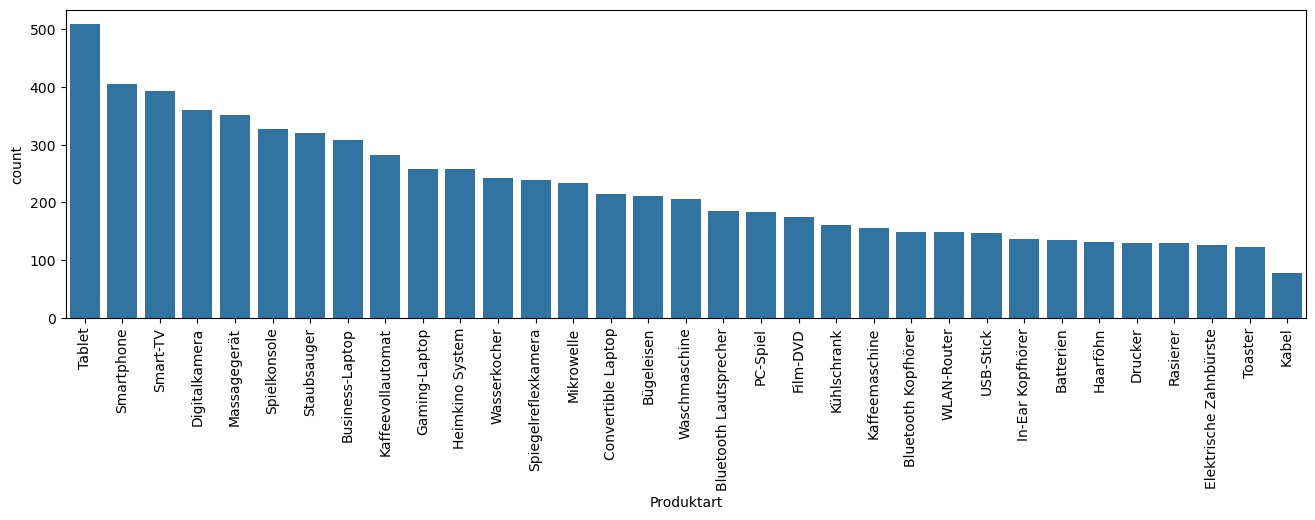

In [85]:
plt.figure(figsize=(16,4))
sns.countplot(data=elektro_cluster_1_df,x='Produktart',order = elektro_cluster_1_df['Produktart'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************

#### Cluster [2]:

In [87]:
elektro_cluster_2_df = elektro_df[elektro_df['Cluster'] == 2]
elektro_cluster_2_df = elektro_cluster_2_df.drop('Cluster',axis=1)
elektro_cluster_2_df

,Rechnung_ID,Produktart,Produkthersteller,Kaufdatum,Anzahl,Preis,Kunden_ID,Alter,Geschlecht,Wohnort,Kanalwahl,Rabattnutzung,Umsatz
0,R10000000,Smartphone,Apple,2016-09-22,1,1163.19,1000,48,Männlich,Bockenem,Online_App,Ja,1163.19
1,R10000001,Kühlschrank,Bosch,2016-08-24,1,429.49,1000,48,Männlich,Bockenem,Online_App,Ja,429.49
2,R10000003,Kühlschrank,LG,2016-05-10,1,413.19,1000,48,Männlich,Bockenem,Store,Ja,413.19
3,R10000002,Drucker,HP,2016-12-11,1,79.74,1000,48,Männlich,Bockenem,Online_App,Nein,79.74
4,R10000003,Spiegelreflexkamera,Canon,2016-05-10,1,426.79,1000,48,Männlich,Bockenem,Store,Nein,426.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34367,R99960000,Kühlschrank,LG,2016-10-07,1,609.29,9996,30,Weiblich,Ronnenberg,Store,Nein,609.29
34368,R99960000,Waschmaschine,Bosch,2016-10-07,1,1128.99,9996,30,Weiblich,Ronnenberg,Store,Ja,1128.99
34369,R99960003,Digitalkamera,Panasonic,2016-04-10,1,2549.39,9996,30,Weiblich,Ronnenberg,Online_App,Ja,2549.39
34370,R99960004,Staubsauger,Samsung,2016-06-06,1,120.89,9996,30,Weiblich,Ronnenberg,Online_App,Nein,120.89


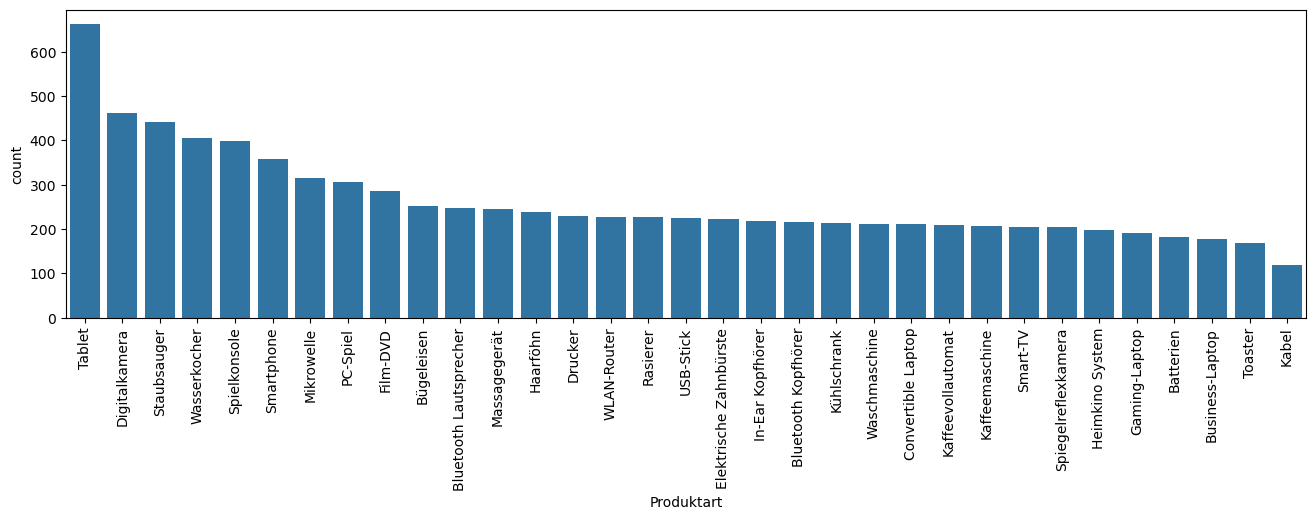

In [89]:
plt.figure(figsize=(16,4))
sns.countplot(data=elektro_cluster_2_df,x='Produktart',order = elektro_cluster_2_df['Produktart'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************

#### Cluster [3]:

In [91]:
elektro_cluster_3_df = elektro_df[elektro_df['Cluster'] == 3]
elektro_cluster_3_df = elektro_cluster_3_df.drop('Cluster',axis=1)
elektro_cluster_3_df

,Rechnung_ID,Produktart,Produkthersteller,Kaufdatum,Anzahl,Preis,Kunden_ID,Alter,Geschlecht,Wohnort,Kanalwahl,Rabattnutzung,Umsatz
5,R10010001,Staubsauger,Bosch,2016-04-04,1,101.09,1001,40,Weiblich,Goslar,Online_App,Ja,101.09
6,R10010001,Elektrische Zahnbürste,Oral-B,2016-04-04,3,108.09,1001,40,Weiblich,Goslar,Online_App,Nein,324.27
7,R10010001,Bügeleisen,Tefal,2016-04-04,1,148.00,1001,40,Weiblich,Goslar,Online_App,Ja,148.00
8,R10010000,Haarföhn,Grundig,2016-04-01,1,271.89,1001,40,Weiblich,Goslar,Online_App,Nein,271.89
9,R10010001,Bügeleisen,Philips,2016-04-04,1,315.58,1001,40,Weiblich,Goslar,Online_App,Ja,315.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34265,R99750000,Rasierer,Braun,2016-01-02,1,195.49,9975,65,Weiblich,Ilsede,Store,Ja,195.49
34303,R99840000,Kaffeemaschine,Philips,2016-01-28,1,382.79,9984,40,Weiblich,Adenbüttel,Store,Nein,382.79
34304,R99840000,Wasserkocher,Bosch,2016-01-28,1,58.69,9984,40,Weiblich,Adenbüttel,Store,Nein,58.69
34305,R99840000,Bügeleisen,Braun,2016-01-28,1,459.39,9984,40,Weiblich,Adenbüttel,Store,Nein,459.39


In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************

#### Und für das Ausreißersegment M:

In [93]:
m_ausreisser_df

,Kunden_ID,Monetary_Value,Frequency,Letztes_Kaufdatum,Recency
57,1063,8000.78,1,2016-10-18,74
122,1139,9651.65,1,2016-12-15,16
154,1175,8037.28,2,2016-08-03,150
162,1186,19397.55,4,2016-07-27,157
167,1191,8355.60,4,2016-12-27,4
...,...,...,...,...,...
7707,9978,9439.15,1,2016-04-05,270
7714,9985,8378.62,5,2016-09-23,99
7718,9989,11501.64,5,2016-09-15,107
7720,9991,12694.22,4,2016-09-07,115


In [95]:
data_kunden_serie = elektro_df['Kunden_ID']

In [97]:
index_liste = []

for i1, e1 in m_ausreisser_df['Kunden_ID'].items():
    for i2, e2 in data_kunden_serie.items():
        if e1 == e2:
            index_liste.append(i2)

In [99]:
len(index_liste)

1765

In [105]:
index_liste[0:999]

[216,
 217,
 218,
 494,
 495,
 496,
 497,
 498,
 499,
 500,
 501,
 629,
 630,
 631,
 632,
 667,
 668,
 669,
 670,
 671,
 672,
 691,
 692,
 693,
 694,
 695,
 696,
 697,
 698,
 699,
 700,
 701,
 747,
 748,
 749,
 750,
 751,
 752,
 753,
 754,
 755,
 756,
 842,
 843,
 844,
 845,
 846,
 847,
 848,
 849,
 850,
 851,
 852,
 853,
 854,
 855,
 856,
 857,
 858,
 859,
 860,
 861,
 862,
 863,
 884,
 885,
 886,
 887,
 888,
 889,
 890,
 891,
 892,
 893,
 1057,
 1058,
 1059,
 1060,
 1061,
 1062,
 1206,
 1207,
 1208,
 1209,
 1210,
 1211,
 1212,
 1213,
 1631,
 1632,
 1633,
 1634,
 1635,
 1636,
 1637,
 1638,
 1652,
 1653,
 1654,
 1655,
 1656,
 1657,
 1658,
 1659,
 1660,
 1696,
 1697,
 1698,
 1699,
 1700,
 1701,
 1836,
 1837,
 1838,
 1839,
 1840,
 1841,
 1842,
 1843,
 1844,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1945,
 1946,
 1947,
 1948,
 2033,
 2034,
 2035,
 2036,
 2037,
 2038,
 2078,
 2079,
 2080,
 2081,
 2082,
 2083,
 2084,
 2085,
 2086,
 2087,
 2088,
 2415,
 2416,
 2417,
 24

In [107]:
index_liste[999::]

[21482,
 21483,
 21484,
 21485,
 21486,
 21487,
 21488,
 21489,
 21490,
 21588,
 21589,
 21590,
 21591,
 21592,
 21593,
 21617,
 21618,
 21619,
 21710,
 21711,
 21712,
 21713,
 21714,
 21715,
 21716,
 21717,
 21882,
 21883,
 21884,
 21885,
 21886,
 21887,
 21888,
 21964,
 21965,
 21966,
 21967,
 21968,
 21969,
 21970,
 21971,
 22001,
 22002,
 22003,
 22004,
 22005,
 22006,
 22007,
 22008,
 22137,
 22138,
 22139,
 22140,
 22141,
 22142,
 22143,
 22144,
 22145,
 22146,
 22147,
 22148,
 22355,
 22356,
 22357,
 22358,
 22359,
 22360,
 22361,
 22362,
 22589,
 22590,
 22591,
 22592,
 22593,
 22594,
 22595,
 22596,
 22597,
 22598,
 22599,
 22600,
 23018,
 23019,
 23020,
 23021,
 23022,
 23023,
 23024,
 23025,
 23026,
 23027,
 23028,
 23096,
 23097,
 23098,
 23099,
 23100,
 23101,
 23187,
 23188,
 23189,
 23190,
 23191,
 23192,
 23193,
 23194,
 23195,
 23196,
 23213,
 23214,
 23215,
 23216,
 23217,
 23218,
 23367,
 23368,
 23369,
 23370,
 23376,
 23377,
 23378,
 23379,
 23380,
 23381,
 23382,


In [114]:
df_concat1 = elektro_df.iloc[[216,
 217,
 218,
 494,
 495,
 496,
 497,
 498,
 499,
 500,
 501,
 629,
 630,
 631,
 632,
 667,
 668,
 669,
 670,
 671,
 672,
 691,
 692,
 693,
 694,
 695,
 696,
 697,
 698,
 699,
 700,
 701,
 747,
 748,
 749,
 750,
 751,
 752,
 753,
 754,
 755,
 756,
 842,
 843,
 844,
 845,
 846,
 847,
 848,
 849,
 850,
 851,
 852,
 853,
 854,
 855,
 856,
 857,
 858,
 859,
 860,
 861,
 862,
 863,
 884,
 885,
 886,
 887,
 888,
 889,
 890,
 891,
 892,
 893,
 1057,
 1058,
 1059,
 1060,
 1061,
 1062,
 1206,
 1207,
 1208,
 1209,
 1210,
 1211,
 1212,
 1213,
 1631,
 1632,
 1633,
 1634,
 1635,
 1636,
 1637,
 1638,
 1652,
 1653,
 1654,
 1655,
 1656,
 1657,
 1658,
 1659,
 1660,
 1696,
 1697,
 1698,
 1699,
 1700,
 1701,
 1836,
 1837,
 1838,
 1839,
 1840,
 1841,
 1842,
 1843,
 1844,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1945,
 1946,
 1947,
 1948,
 2033,
 2034,
 2035,
 2036,
 2037,
 2038,
 2078,
 2079,
 2080,
 2081,
 2082,
 2083,
 2084,
 2085,
 2086,
 2087,
 2088,
 2415,
 2416,
 2417,
 2418,
 2419,
 2440,
 2441,
 2442,
 2443,
 2444,
 2445,
 2446,
 2447,
 2448,
 2449,
 2450,
 2451,
 2452,
 2453,
 2454,
 2455,
 2456,
 2457,
 2462,
 2463,
 2464,
 2465,
 2466,
 2467,
 2468,
 2500,
 2501,
 2502,
 2503,
 2504,
 2505,
 2506,
 2634,
 2635,
 2636,
 2637,
 2638,
 2639,
 2640,
 2641,
 2642,
 2643,
 2644,
 2645,
 2646,
 2647,
 2648,
 2649,
 2740,
 2741,
 2742,
 2743,
 2744,
 2745,
 2746,
 2848,
 2849,
 2850,
 2851,
 2852,
 2853,
 2854,
 2855,
 2856,
 2857,
 3190,
 3191,
 3192,
 3193,
 3194,
 3195,
 3196,
 3197,
 3210,
 3211,
 3212,
 3213,
 3214,
 3215,
 3216,
 3458,
 3459,
 3460,
 3461,
 3462,
 3463,
 3464,
 3465,
 3839,
 3840,
 3841,
 3842,
 3843,
 3844,
 3845,
 3846,
 3847,
 3848,
 3849,
 3850,
 3995,
 3996,
 3997,
 3998,
 3999,
 4000,
 4001,
 4002,
 4003,
 4004,
 4346,
 4347,
 4348,
 4349,
 4350,
 4351,
 4352,
 4440,
 4441,
 4442,
 4443,
 4444,
 4445,
 4446,
 4447,
 4479,
 4480,
 4481,
 4482,
 4483,
 4484,
 4832,
 4833,
 4834,
 4835,
 4836,
 4837,
 4838,
 4839,
 5002,
 5003,
 5004,
 5005,
 5006,
 5007,
 5008,
 5088,
 5089,
 5090,
 5091,
 5092,
 5093,
 5094,
 5492,
 5493,
 5494,
 5495,
 5496,
 5497,
 5498,
 5499,
 5500,
 5503,
 5504,
 5505,
 5506,
 5507,
 5508,
 5509,
 5619,
 5620,
 5621,
 5622,
 5654,
 5655,
 5656,
 5657,
 5658,
 5742,
 5743,
 5744,
 5745,
 5746,
 5747,
 5748,
 5749,
 5750,
 5847,
 5848,
 5849,
 5850,
 5851,
 5852,
 5853,
 5854,
 5855,
 6404,
 6405,
 6406,
 6407,
 6408,
 6409,
 6410,
 6411,
 6496,
 6497,
 6498,
 6499,
 6500,
 6501,
 6502,
 6529,
 6530,
 6531,
 6532,
 6533,
 6534,
 6574,
 6575,
 6576,
 6577,
 6578,
 6579,
 6580,
 6710,
 6711,
 6712,
 6713,
 6714,
 6715,
 6716,
 6717,
 6957,
 6958,
 6959,
 6960,
 6961,
 7188,
 7189,
 7190,
 7191,
 7192,
 7193,
 7194,
 7195,
 7249,
 7250,
 7251,
 7252,
 7253,
 7254,
 7255,
 7256,
 7257,
 7258,
 7259,
 7533,
 7534,
 7535,
 7536,
 7537,
 7538,
 7539,
 7540,
 7541,
 7593,
 7594,
 7595,
 7596,
 7597,
 7598,
 7599,
 7600,
 7634,
 7635,
 7636,
 7637,
 7638,
 7639,
 7943,
 7944,
 7945,
 7946,
 7947,
 7948,
 7949,
 7950,
 7951,
 8622,
 8623,
 8624,
 8625,
 8626,
 8791,
 8792,
 8793,
 8794,
 8795,
 8796,
 9005,
 9006,
 9007,
 9008,
 9009,
 9010,
 9011,
 9012,
 9013,
 9018,
 9019,
 9020,
 9021,
 9022,
 9023,
 9024,
 9190,
 9191,
 9192,
 9193,
 9194,
 9195,
 9196,
 9197,
 9198,
 9199,
 9200,
 9201,
 9202,
 9203,
 9204,
 9205,
 9364,
 9365,
 9366,
 9367,
 9524,
 9525,
 9526,
 9527,
 9557,
 9558,
 9559,
 9560,
 9561,
 9562,
 9563,
 9564,
 9565,
 9685,
 9686,
 9687,
 9688,
 9689,
 9690,
 9691,
 9692,
 9825,
 9893,
 9894,
 9895,
 9896,
 9957,
 9958,
 9959,
 9960,
 9961,
 9962,
 10024,
 10025,
 10026,
 10027,
 10028,
 10029,
 10030,
 10298,
 10299,
 10300,
 10301,
 10302,
 10303,
 10304,
 10406,
 10407,
 10408,
 10409,
 10410,
 10411,
 10412,
 10413,
 10414,
 10611,
 10923,
 10924,
 10925,
 10926,
 11015,
 11016,
 11017,
 11018,
 11019,
 11020,
 11021,
 11303,
 11304,
 11305,
 11306,
 11307,
 11308,
 11309,
 11310,
 11311,
 11341,
 11342,
 11343,
 11344,
 11345,
 11346,
 11347,
 11348,
 11349,
 11427,
 11428,
 11429,
 11430,
 11431,
 11432,
 11433,
 11434,
 11435,
 11788,
 11789,
 11790,
 11791,
 11792,
 11793,
 11794,
 11795,
 12132,
 12133,
 12134,
 12135,
 12136,
 12137,
 12138,
 12139,
 12140,
 12141,
 12142,
 12143,
 12144,
 12145,
 12146,
 12147,
 12165,
 12166,
 12167,
 12168,
 12188,
 12189,
 12190,
 12191,
 12192,
 12193,
 12194,
 12195,
 12196,
 12287,
 12288,
 12289,
 12290,
 12291,
 12292,
 12362,
 12363,
 12364,
 12365,
 12366,
 12367,
 12373,
 12374,
 12375,
 12376,
 12377,
 12378,
 12379,
 12380,
 12381,
 12691,
 12692,
 12693,
 12694,
 12695,
 12696,
 12745,
 12746,
 12747,
 12748,
 12749,
 12750,
 12751,
 12752,
 12753,
 12764,
 12765,
 12766,
 12767,
 12768,
 12769,
 12858,
 12859,
 12860,
 12861,
 12862,
 13095,
 13096,
 13097,
 13098,
 13099,
 13100,
 13101,
 13492,
 13493,
 13494,
 13495,
 13496,
 13538,
 13539,
 13540,
 13541,
 13542,
 13543,
 13838,
 13839,
 13840,
 13841,
 13842,
 13887,
 13888,
 13889,
 13890,
 13891,
 13892,
 13893,
 13894,
 13988,
 13989,
 13990,
 13991,
 13992,
 13993,
 13994,
 13995,
 13996,
 14010,
 14011,
 14012,
 14013,
 14014,
 14095,
 14096,
 14097,
 14098,
 14099,
 14325,
 14326,
 14327,
 14328,
 14329,
 14330,
 14331,
 14332,
 14477,
 14478,
 14479,
 14480,
 14481,
 14482,
 14605,
 14606,
 14607,
 14608,
 14609,
 14610,
 14611,
 14612,
 14613,
 14614,
 14654,
 14655,
 14656,
 14657,
 14658,
 14659,
 14660,
 14661,
 14816,
 14817,
 14818,
 14819,
 14820,
 14821,
 14954,
 14955,
 14956,
 14957,
 14958,
 14959,
 15471,
 15472,
 15473,
 15474,
 15475,
 15476,
 15477,
 15478,
 15479,
 15694,
 15695,
 15696,
 15697,
 15698,
 15699,
 15801,
 15802,
 15803,
 15804,
 15805,
 15806,
 15807,
 15808,
 15809,
 15810,
 15811,
 16077,
 16078,
 16079,
 16080,
 16081,
 16082,
 16392,
 16393,
 16394,
 16395,
 16396,
 16397,
 16398,
 16585,
 16586,
 16587,
 16588,
 16589,
 16590,
 16634,
 16635,
 16636,
 16637,
 16638,
 16639,
 16640,
 16641,
 16642,
 16643,
 16644,
 16710,
 16711,
 16712,
 16713,
 16714,
 16715,
 16716,
 16717,
 16718,
 16719,
 16760,
 16761,
 16962,
 16963,
 16964,
 16965,
 16974,
 16975,
 17156,
 17157,
 17158,
 17159,
 17160,
 17161,
 17162,
 17637,
 17638,
 17639,
 17640,
 17641,
 17714,
 17715,
 17716,
 17717,
 17718,
 17719,
 17720,
 17721,
 17785,
 17786,
 17787,
 17788,
 17789,
 17790,
 17791,
 17792,
 17793,
 17794,
 17795,
 18044,
 18045,
 18046,
 18047,
 18048,
 18049,
 18119,
 18120,
 18121,
 18122,
 18123,
 18124,
 18442,
 18443,
 18444,
 18445,
 18446,
 18447,
 18448,
 18449,
 18450,
 18451,
 18452,
 18680,
 18681,
 18682,
 18683,
 18684,
 18685,
 18686,
 18687,
 18688,
 18689,
 18903,
 18904,
 18905,
 18906,
 18907,
 19246,
 19247,
 19248,
 19249,
 19250,
 19251,
 19309,
 19310,
 19311,
 19312,
 19313,
 19314,
 19345,
 19346,
 19347,
 19565,
 19566,
 19567,
 19568,
 19569,
 19570,
 19779,
 19780,
 19781,
 19782,
 19783,
 19784,
 19785,
 19786,
 19787,
 19788,
 19840,
 19841,
 19842,
 19843,
 19844,
 19845,
 19846,
 19870,
 19871,
 19872,
 19873,
 19874,
 19875,
 19876,
 20000,
 20001,
 20002,
 20080,
 20081,
 20082,
 20083,
 20084,
 20085,
 20086,
 20087,
 20088,
 20481,
 20482,
 20483,
 20484,
 20485,
 20486,
 20487,
 20488,
 20607,
 20608,
 20609,
 20610,
 20611,
 20612,
 20752,
 20753,
 20754,
 20755,
 20756,
 20757,
 20758,
 20759,
 21234,
 21235,
 21236,
 21237,
 21238,
 21239,
 21240,
 21241,
 21242,
 21449,
 21450,
 21478,
 21479,
 21480,
 21481]]

In [116]:
df_concat2 = elektro_df.iloc[[21482,
 21483,
 21484,
 21485,
 21486,
 21487,
 21488,
 21489,
 21490,
 21588,
 21589,
 21590,
 21591,
 21592,
 21593,
 21617,
 21618,
 21619,
 21710,
 21711,
 21712,
 21713,
 21714,
 21715,
 21716,
 21717,
 21882,
 21883,
 21884,
 21885,
 21886,
 21887,
 21888,
 21964,
 21965,
 21966,
 21967,
 21968,
 21969,
 21970,
 21971,
 22001,
 22002,
 22003,
 22004,
 22005,
 22006,
 22007,
 22008,
 22137,
 22138,
 22139,
 22140,
 22141,
 22142,
 22143,
 22144,
 22145,
 22146,
 22147,
 22148,
 22355,
 22356,
 22357,
 22358,
 22359,
 22360,
 22361,
 22362,
 22589,
 22590,
 22591,
 22592,
 22593,
 22594,
 22595,
 22596,
 22597,
 22598,
 22599,
 22600,
 23018,
 23019,
 23020,
 23021,
 23022,
 23023,
 23024,
 23025,
 23026,
 23027,
 23028,
 23096,
 23097,
 23098,
 23099,
 23100,
 23101,
 23187,
 23188,
 23189,
 23190,
 23191,
 23192,
 23193,
 23194,
 23195,
 23196,
 23213,
 23214,
 23215,
 23216,
 23217,
 23218,
 23367,
 23368,
 23369,
 23370,
 23376,
 23377,
 23378,
 23379,
 23380,
 23381,
 23382,
 23391,
 23392,
 23393,
 23394,
 23464,
 23465,
 23466,
 23467,
 23468,
 23469,
 23470,
 23471,
 23746,
 23747,
 23748,
 23749,
 23750,
 23751,
 23752,
 24152,
 24153,
 24154,
 24155,
 24156,
 24157,
 24158,
 24286,
 24287,
 24288,
 24289,
 24290,
 24291,
 24705,
 24706,
 24707,
 24708,
 24709,
 24710,
 24711,
 24712,
 24730,
 24731,
 24732,
 24733,
 24734,
 24735,
 24736,
 24737,
 24738,
 24859,
 24860,
 24861,
 24862,
 24863,
 24864,
 25141,
 25142,
 25143,
 25144,
 25145,
 25146,
 25147,
 25148,
 25149,
 25150,
 25288,
 25289,
 25290,
 25291,
 25292,
 25296,
 25297,
 25298,
 25299,
 25300,
 25301,
 25302,
 25667,
 25668,
 25669,
 25670,
 25671,
 25672,
 25831,
 25832,
 25833,
 25834,
 25835,
 25836,
 25837,
 25863,
 25864,
 25865,
 25866,
 25867,
 25868,
 25869,
 25870,
 25871,
 25886,
 25887,
 25888,
 25889,
 25890,
 25914,
 25915,
 25916,
 25917,
 25918,
 25919,
 25920,
 25921,
 26159,
 26160,
 26161,
 26162,
 26163,
 26164,
 26165,
 26243,
 26244,
 26245,
 26246,
 26247,
 26248,
 26249,
 26250,
 26258,
 26259,
 26260,
 26261,
 26262,
 26293,
 26294,
 26295,
 26296,
 26415,
 26416,
 26417,
 26418,
 26419,
 26420,
 26421,
 26422,
 26423,
 26424,
 26629,
 26630,
 26631,
 26632,
 26633,
 26634,
 26635,
 26636,
 26724,
 26725,
 26726,
 26727,
 26728,
 26729,
 26730,
 26731,
 26732,
 26733,
 26813,
 26814,
 26815,
 26816,
 26817,
 26818,
 26819,
 26820,
 26821,
 26822,
 26865,
 26866,
 26867,
 26868,
 26869,
 26870,
 26871,
 26936,
 26937,
 26938,
 26939,
 26940,
 26941,
 27123,
 27124,
 27125,
 27126,
 27127,
 27128,
 27129,
 27130,
 27451,
 27452,
 27453,
 27454,
 27455,
 27456,
 27457,
 27458,
 27459,
 27521,
 27522,
 27523,
 27524,
 27525,
 27526,
 27527,
 27528,
 27529,
 27537,
 27538,
 27539,
 27540,
 27541,
 27542,
 27543,
 27544,
 27545,
 27640,
 27641,
 27642,
 27643,
 27644,
 27645,
 27663,
 27664,
 27665,
 27666,
 27667,
 27668,
 27669,
 27670,
 27671,
 27950,
 27951,
 27952,
 27953,
 27954,
 27955,
 27956,
 27957,
 27958,
 27959,
 27960,
 27961,
 27962,
 27963,
 27964,
 27965,
 27966,
 28098,
 28099,
 28100,
 28101,
 28102,
 28103,
 28104,
 28105,
 28106,
 28107,
 28108,
 28109,
 28110,
 28111,
 28324,
 28325,
 28326,
 28327,
 28328,
 28329,
 28371,
 28372,
 28373,
 28374,
 28407,
 28408,
 28409,
 28678,
 28679,
 28680,
 28681,
 28682,
 28683,
 28684,
 28685,
 28728,
 28729,
 28730,
 28731,
 28732,
 28733,
 28734,
 28735,
 28736,
 28737,
 28738,
 28739,
 28797,
 28798,
 28799,
 28800,
 28801,
 28958,
 28959,
 28960,
 28961,
 28962,
 29056,
 29057,
 29058,
 29059,
 29060,
 29061,
 29062,
 29063,
 29182,
 29183,
 29184,
 29185,
 29186,
 29187,
 29188,
 29656,
 29657,
 29658,
 29659,
 29660,
 29661,
 29787,
 29788,
 29789,
 29790,
 29791,
 29792,
 29793,
 29794,
 29795,
 30059,
 30060,
 30061,
 30062,
 30063,
 30064,
 30065,
 30066,
 30126,
 30127,
 30128,
 30220,
 30221,
 30222,
 30223,
 30224,
 30334,
 30335,
 30336,
 30337,
 30338,
 30339,
 30340,
 30341,
 30342,
 30851,
 30852,
 30853,
 30854,
 30855,
 30856,
 30857,
 30902,
 30903,
 30904,
 30905,
 30906,
 30907,
 30908,
 31156,
 31157,
 31158,
 31159,
 31160,
 31304,
 31305,
 31306,
 31307,
 31308,
 31309,
 31310,
 31311,
 31312,
 31699,
 31700,
 31701,
 31702,
 31703,
 31704,
 31705,
 31840,
 31841,
 31842,
 31843,
 31844,
 31845,
 31846,
 31880,
 31881,
 31882,
 31883,
 31884,
 31885,
 31886,
 31887,
 32210,
 32211,
 32212,
 32213,
 32214,
 32215,
 32216,
 32217,
 32232,
 32233,
 32234,
 32235,
 32236,
 32503,
 32504,
 32505,
 32506,
 32507,
 32508,
 32574,
 32575,
 32576,
 32577,
 32578,
 32579,
 32580,
 32687,
 32688,
 32689,
 32690,
 32691,
 32692,
 32811,
 32812,
 32813,
 32814,
 32815,
 32816,
 32817,
 32818,
 32819,
 33017,
 33018,
 33019,
 33020,
 33021,
 33022,
 33023,
 33024,
 33025,
 33026,
 33181,
 33182,
 33183,
 33184,
 33185,
 33186,
 33187,
 33188,
 33356,
 33357,
 33358,
 33359,
 33360,
 33361,
 33362,
 33504,
 33505,
 33506,
 33507,
 33508,
 33509,
 33510,
 33585,
 33586,
 33587,
 33588,
 33589,
 33688,
 33689,
 33690,
 33691,
 33692,
 33693,
 33694,
 33695,
 33817,
 33818,
 33819,
 33820,
 33821,
 33822,
 33823,
 33824,
 33903,
 33904,
 33905,
 33934,
 33935,
 33936,
 33937,
 33938,
 33939,
 33940,
 33953,
 33954,
 33955,
 33956,
 33957,
 33958,
 33959,
 33976,
 33977,
 33978,
 33979,
 33980,
 33981,
 33982,
 33983,
 33984,
 33985,
 33986,
 33987,
 33988,
 33989,
 34049,
 34050,
 34051,
 34052,
 34053,
 34054,
 34059,
 34060,
 34061,
 34062,
 34063,
 34064,
 34065,
 34066,
 34083,
 34084,
 34085,
 34094,
 34095,
 34096,
 34097,
 34098,
 34099,
 34100,
 34101,
 34107,
 34108,
 34109,
 34110,
 34111,
 34146,
 34147,
 34148,
 34149,
 34189,
 34190,
 34191,
 34192,
 34193,
 34194,
 34195,
 34196,
 34206,
 34207,
 34208,
 34209,
 34210,
 34216,
 34217,
 34218,
 34219,
 34220,
 34251,
 34252,
 34253,
 34254,
 34255,
 34256,
 34257,
 34258,
 34259,
 34260,
 34261,
 34277,
 34278,
 34279,
 34306,
 34307,
 34308,
 34309,
 34310,
 34311,
 34312,
 34313,
 34314,
 34315,
 34330,
 34331,
 34332,
 34333,
 34334,
 34335,
 34336,
 34342,
 34343,
 34344,
 34345,
 34346,
 34347,
 34348,
 34349,
 34350,
 34351,
 34359,
 34360,
 34361,
 34362,
 34363,
 34364,
 34365]]

In [118]:
elektro_ausreisser_m_df = pd.concat([df_concat1, df_concat2])

In [128]:
#elektro_ausreisser_m_df.to_csv('ausreisser_m.csv')

In [109]:
elektro_ausreisser_m_df = pd.read_csv('ausreisser_m.csv',index_col=0)

In [111]:
elektro_ausreisser_m_df = elektro_ausreisser_m_df.drop('Cluster',axis=1)
elektro_ausreisser_m_df

,Rechnung_ID,Produktart,Produkthersteller,Kaufdatum,Anzahl,Preis,Kunden_ID,Alter,Geschlecht,Wohnort,Kanalwahl,Rabattnutzung,Umsatz
216,R10630000,Smart-TV,Philips,2016-10-18,2,1313.00,1063,28,Weiblich,Hameln,Store,Nein,2626.00
217,R10630000,PC-Spiel,EA,2016-10-18,1,22.29,1063,28,Weiblich,Hameln,Store,Nein,22.29
218,R10630000,Smart-TV,Samsung,2016-10-18,1,5352.49,1063,28,Weiblich,Hameln,Store,Ja,5352.49
494,R11390000,Kabel,NaN,2016-12-15,1,54.34,1139,42,Weiblich,Hannover,Store,Ja,54.34
495,R11390000,Toaster,Bosch,2016-12-15,1,58.99,1139,42,Weiblich,Hannover,Store,Nein,58.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34361,R99950002,Bluetooth Kopfhörer,JBL,2016-08-19,1,171.69,9995,20,Männlich,Lengede,Online_App,Nein,171.69
34362,R99950000,Digitalkamera,Nikon,2016-06-13,1,2641.19,9995,20,Männlich,Lengede,Store,Ja,2641.19
34363,R99950000,Tablet,Microsoft,2016-06-13,1,326.29,9995,20,Männlich,Lengede,Store,Ja,326.29
34364,R99950000,Smart-TV,LG,2016-06-13,1,1222.00,9995,20,Männlich,Lengede,Store,Nein,1222.00


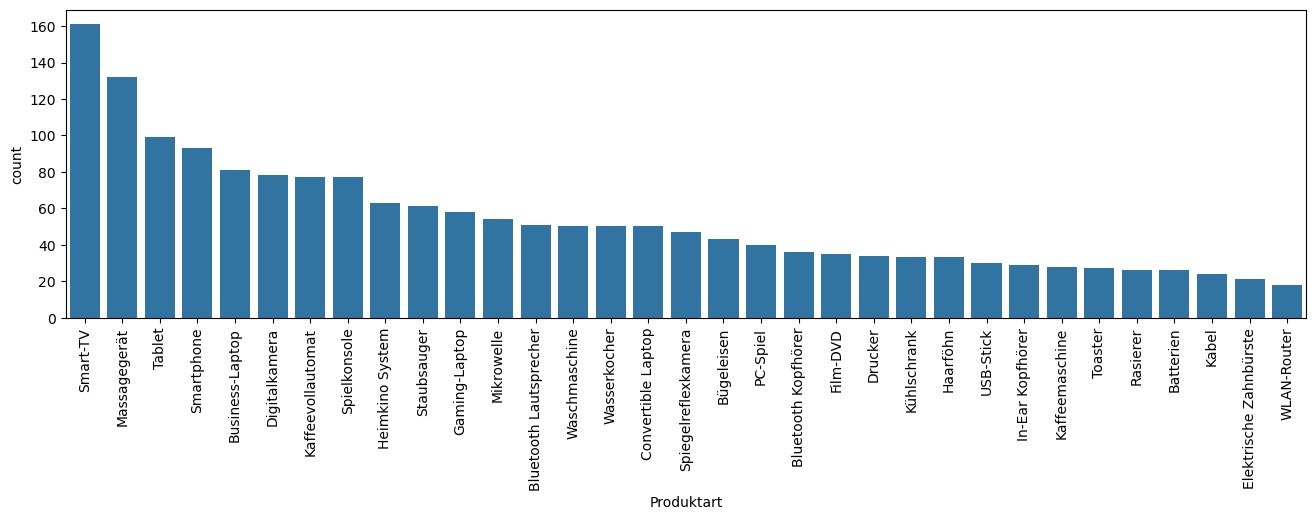

In [113]:
plt.figure(figsize=(16,4))
sns.countplot(data=elektro_ausreisser_m_df,x='Produktart',order = elektro_ausreisser_m_df['Produktart'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [115]:
elektro_ausreisser_m_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1765 entries, 216 to 34365
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rechnung_ID        1765 non-null   object 
 1   Produktart         1765 non-null   object 
 2   Produkthersteller  1706 non-null   object 
 3   Kaufdatum          1765 non-null   object 
 4   Anzahl             1765 non-null   int64  
 5   Preis              1765 non-null   float64
 6   Kunden_ID          1765 non-null   int64  
 7   Alter              1765 non-null   int64  
 8   Geschlecht         1765 non-null   object 
 9   Wohnort            1765 non-null   object 
 10  Kanalwahl          1765 non-null   object 
 11  Rabattnutzung      1765 non-null   object 
 12  Umsatz             1765 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 193.0+ KB


In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

### Nach psychografischen Kriterien segmentieren:

#### Kanalpräferenz

In [117]:
# Funktion für Anteil der Käufe:

def anteil_käufe(df):
    
    # 1. Anzahl der Käufe pro Kanal und Kunde berechnen
    kanal_anzahl = df.groupby(['Kunden_ID','Kanalwahl']).size().unstack(fill_value=0)

    # 2. Gesamtzahl der Käufe pro Kunde berechnen
    kanal_anzahl['Gesamtkäufe'] = kanal_anzahl.sum(axis=1)

    # 3. Anteil der Käufe pro Kanal berechnen
    kanal_pref = kanal_anzahl.div(kanal_anzahl['Gesamtkäufe'], axis=0)
    
    return kanal_pref

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************

#### Für Cluster [0]:

In [119]:
# Anteile bestimmen:
kanal_pref_cl0_df = anteil_käufe(elektro_cluster_0_df)

In [121]:
kanal_pref_cl0_df

Kanalwahl,Online_App,Online_Desktop,Store,Gesamtkäufe
Kunden_ID,,,,
1004,1.0,0.0,0.0,1.0
1005,0.0,1.0,0.0,1.0
1007,0.0,0.6,0.4,1.0
1008,0.0,1.0,0.0,1.0
1012,0.0,0.0,1.0,1.0
...,...,...,...,...
9981,1.0,0.0,0.0,1.0
9983,1.0,0.0,0.0,1.0
9987,1.0,0.0,0.0,1.0


In [123]:
cl0_kanal_df = kanal_pref_cl0_df.drop(['Gesamtkäufe'],axis=1)

In [125]:
cl0_kanal_df

Kanalwahl,Online_App,Online_Desktop,Store
Kunden_ID,,,
1004,1.0,0.0,0.0
1005,0.0,1.0,0.0
1007,0.0,0.6,0.4
1008,0.0,1.0,0.0
1012,0.0,0.0,1.0
...,...,...,...
9981,1.0,0.0,0.0
9983,1.0,0.0,0.0
9987,1.0,0.0,0.0


In [127]:
def anteile_verteilen_string(df):

    cluster_liste_string = []

    for item, row in df.iterrows():
        if row[0] > 0.5:
            cluster_liste_string.append('Online_App')
        elif row[1] > 0.5:
            cluster_liste_string.append('Online_Desktop')
        elif row[2] > 0.5:
            cluster_liste_string.append('Store')
        else:
            cluster_liste_string.append('Multichannel')
            
    return cluster_liste_string

In [129]:
def anteile_verteilen_int(df):

    cluster_liste_int = []

    for item, row in df.iterrows():
        if row[0] > 0.5:
            cluster_liste_int.append(0)
        elif row[1] > 0.5:
            cluster_liste_int.append(1)
        elif row[2] > 0.5:
            cluster_liste_int.append(2)
        else:
            cluster_liste_int.append(3)
            
    return cluster_liste_int

In [131]:
cl0_kanal_df['Präferenz'] = anteile_verteilen_string(cl0_kanal_df)
cl0_kanal_df['Cluster'] = anteile_verteilen_int(cl0_kanal_df)

In [133]:
cl0_kanal_df

Kanalwahl,Online_App,Online_Desktop,Store,Präferenz,Cluster
Kunden_ID,,,,,
1004,1.0,0.0,0.0,Online_App,0
1005,0.0,1.0,0.0,Online_Desktop,1
1007,0.0,0.6,0.4,Online_Desktop,1
1008,0.0,1.0,0.0,Online_Desktop,1
1012,0.0,0.0,1.0,Store,2
...,...,...,...,...,...
9981,1.0,0.0,0.0,Online_App,0
9983,1.0,0.0,0.0,Online_App,0
9987,1.0,0.0,0.0,Online_App,0


In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************

#### Für Cluster [1]:

In [135]:
# Anteile bestimmen:
kanal_pref_cl1_df = anteil_käufe(elektro_cluster_1_df)

In [137]:
cl1_kanal_df = kanal_pref_cl1_df.drop(['Gesamtkäufe'],axis=1)

In [139]:
cl1_kanal_df['Präferenz'] = anteile_verteilen_string(cl1_kanal_df)
cl1_kanal_df['Cluster'] = anteile_verteilen_int(cl1_kanal_df)

In [141]:
cl1_kanal_df.head(4)

Kanalwahl,Online_App,Online_Desktop,Store,Präferenz,Cluster
Kunden_ID,,,,,
1003,0.0,0.0,1.0,Store,2
1009,1.0,0.0,0.0,Online_App,0
1022,0.0,0.0,1.0,Store,2
1025,0.5,0.0,0.5,Multichannel,3


In [143]:
cl1_kanal_df[cl1_kanal_df['Cluster'] == 3].describe()

Kanalwahl,Online_App,Online_Desktop,Store,Cluster
count,114.000000,114.000000,114.000000,114.0
mean,0.376536,0.288483,0.334980,3.0
std,0.198976,0.234227,0.219499,0.0
min,0.000000,0.000000,0.000000,3.0
25%,0.333333,0.000000,0.000000,3.0
50%,0.500000,0.477273,0.500000,3.0
75%,0.500000,0.500000,0.500000,3.0
max,0.500000,0.500000,0.500000,3.0


In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************

#### Für Cluster [2]:

In [145]:
# Anteile bestimmen:
kanal_pref_cl2_df = anteil_käufe(elektro_cluster_2_df)

In [147]:
cl2_kanal_df = kanal_pref_cl2_df.drop(['Gesamtkäufe'],axis=1)

In [149]:
cl2_kanal_df['Präferenz'] = anteile_verteilen_string(cl2_kanal_df)
cl2_kanal_df['Cluster'] = anteile_verteilen_int(cl2_kanal_df)

In [151]:
cl2_kanal_df.head(4)

Kanalwahl,Online_App,Online_Desktop,Store,Präferenz,Cluster
Kunden_ID,,,,,
1000,0.600000,0.000000,0.400000,Online_App,0
1006,0.444444,0.444444,0.111111,Multichannel,3
1013,1.000000,0.000000,0.000000,Online_App,0
1014,0.750000,0.250000,0.000000,Online_App,0


In [153]:
cl2_kanal_df[cl2_kanal_df['Cluster'] == 3].describe()

Kanalwahl,Online_App,Online_Desktop,Store,Cluster
count,377.000000,377.000000,377.000000,377.0
mean,0.365756,0.288737,0.345508,3.0
std,0.139001,0.169153,0.153678,0.0
min,0.000000,0.000000,0.000000,3.0
25%,0.285714,0.166667,0.250000,3.0
50%,0.400000,0.333333,0.400000,3.0
75%,0.500000,0.428571,0.500000,3.0
max,0.500000,0.500000,0.500000,3.0


In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************

#### Für Cluster [3]:

In [155]:
# Anteile bestimmen:
kanal_pref_cl3_df = anteil_käufe(elektro_cluster_3_df)

In [157]:
cl3_kanal_df = kanal_pref_cl3_df.drop(['Gesamtkäufe'],axis=1)

In [159]:
cl3_kanal_df['Präferenz'] = anteile_verteilen_string(cl3_kanal_df)
cl3_kanal_df['Cluster'] = anteile_verteilen_int(cl3_kanal_df)

In [161]:
cl3_kanal_df.head(4)

Kanalwahl,Online_App,Online_Desktop,Store,Präferenz,Cluster
Kunden_ID,,,,,
1001,1.0,0.0,0.0,Online_App,0
1002,1.0,0.0,0.0,Online_App,0
1015,1.0,0.0,0.0,Online_App,0
1016,1.0,0.0,0.0,Online_App,0


In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

#### Rabattnutzung

In [163]:
# Funktion für Anteile von Rabattnutzung:

def anteil_rabatte(df):
    
    # 1. Zähle die Käufe mit und ohne Rabatt pro Kunde
    rabatt_anzahl = df.groupby(['Kunden_ID','Rabattnutzung']).size().unstack(fill_value=0)

    # 2. Gesamtzahl Rabatt pro Kunde berechnen
    rabatt_anzahl['Gesamtrabatte'] = rabatt_anzahl.sum(axis=1)

    # 3. Anteil von Rabattnutzung berechnen:
    rabatt_gewichte = rabatt_anzahl.div(rabatt_anzahl['Gesamtrabatte'], axis=0)
    
    return rabatt_gewichte

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************

#### Für Cluster [0]:

In [165]:
rabatt_gewichte_cl0_df = anteil_rabatte(elektro_cluster_0_df)

In [167]:
rabatt_gewichte_cl0_df.head(4)

Rabattnutzung,Ja,Nein,Gesamtrabatte
Kunden_ID,,,
1004,0.000000,1.000000,1.0
1005,0.333333,0.666667,1.0
1007,0.200000,0.800000,1.0
1008,0.250000,0.750000,1.0


In [169]:
rabatt_gewichte_cl0_df = rabatt_gewichte_cl0_df[['Ja']]
rabatt_gewichte_cl0_df = rabatt_gewichte_cl0_df.rename(columns={'Ja' : 'Anteil_Rabattnutzung'})

In [171]:
rabatt_gewichte_cl0_df.head(4)

Rabattnutzung,Anteil_Rabattnutzung
Kunden_ID,
1004,0.000000
1005,0.333333
1007,0.200000
1008,0.250000


In [173]:
# Funktion um Segmente nach Rabattgewichtungen zu bilden:

def rabatt_gewichter(eingabe):
    
    if eingabe <= 0.2:
        return 0
    elif 0.2 < eingabe <= 0.5:
        return 1
    else:
        return 2

In [175]:
rabatt_gewichte_cl0_df['Rabattnutzungsneigung'] = rabatt_gewichte_cl0_df['Anteil_Rabattnutzung'].apply(rabatt_gewichter)

In [177]:
rabatt_gewichte_cl0_df.head(4)

Rabattnutzung,Anteil_Rabattnutzung,Rabattnutzungsneigung
Kunden_ID,,
1004,0.000000,0
1005,0.333333,1
1007,0.200000,0
1008,0.250000,1


In [179]:
rabatt_gewichte_cl0_df[rabatt_gewichte_cl0_df['Rabattnutzungsneigung'] == 0]

Rabattnutzung,Anteil_Rabattnutzung,Rabattnutzungsneigung
Kunden_ID,,
1004,0.000000,0
1007,0.200000,0
1028,0.000000,0
1034,0.000000,0
1035,0.000000,0
...,...,...
9938,0.000000,0
9939,0.000000,0
9940,0.200000,0


In [181]:
rabatt_gewichte_cl0_df[rabatt_gewichte_cl0_df['Rabattnutzungsneigung'] == 1]

Rabattnutzung,Anteil_Rabattnutzung,Rabattnutzungsneigung
Kunden_ID,,
1005,0.333333,1
1008,0.250000,1
1019,0.333333,1
1032,0.400000,1
1037,0.500000,1
...,...,...
9949,0.250000,1
9972,0.250000,1
9973,0.400000,1


In [183]:
rabatt_gewichte_cl0_df[rabatt_gewichte_cl0_df['Rabattnutzungsneigung'] == 2]

Rabattnutzung,Anteil_Rabattnutzung,Rabattnutzungsneigung
Kunden_ID,,
1012,1.000000,2
1031,1.000000,2
1077,0.750000,2
1079,0.666667,2
1089,0.666667,2
...,...,...
9924,1.000000,2
9926,0.750000,2
9942,0.800000,2


In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************

#### Für Cluster [1]:

In [185]:
rabatt_gewichte_cl1_df = anteil_rabatte(elektro_cluster_1_df)

In [187]:
rabatt_gewichte_cl1_df = rabatt_gewichte_cl1_df[['Ja']]
rabatt_gewichte_cl1_df = rabatt_gewichte_cl1_df.rename(columns={'Ja' : 'Anteil_Rabattnutzung'})

In [189]:
rabatt_gewichte_cl1_df['Rabattnutzungsneigung'] = rabatt_gewichte_cl1_df['Anteil_Rabattnutzung'].apply(rabatt_gewichter)

In [191]:
rabatt_gewichte_cl1_df

Rabattnutzung,Anteil_Rabattnutzung,Rabattnutzungsneigung
Kunden_ID,,
1003,0.500000,1
1009,0.000000,0
1022,0.500000,1
1025,0.166667,0
1026,0.000000,0
...,...,...
9971,0.875000,2
9977,0.600000,2
9979,0.250000,1


In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************

#### Für Cluster [2]:

In [193]:
rabatt_gewichte_cl2_df = anteil_rabatte(elektro_cluster_2_df)

In [195]:
rabatt_gewichte_cl2_df = rabatt_gewichte_cl2_df[['Ja']]
rabatt_gewichte_cl2_df = rabatt_gewichte_cl2_df.rename(columns={'Ja' : 'Anteil_Rabattnutzung'})

In [197]:
rabatt_gewichte_cl2_df['Rabattnutzungsneigung'] = rabatt_gewichte_cl2_df['Anteil_Rabattnutzung'].apply(rabatt_gewichter)

In [199]:
rabatt_gewichte_cl2_df

Rabattnutzung,Anteil_Rabattnutzung,Rabattnutzungsneigung
Kunden_ID,,
1000,0.600000,2
1006,0.444444,1
1013,0.500000,1
1014,0.500000,1
1021,0.500000,1
...,...,...
9980,0.600000,2
9982,0.777778,2
9986,0.666667,2


In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************

#### Für Cluster [3]:

In [201]:
rabatt_gewichte_cl3_df = anteil_rabatte(elektro_cluster_3_df)

In [203]:
rabatt_gewichte_cl3_df = rabatt_gewichte_cl3_df[['Ja']]
rabatt_gewichte_cl3_df = rabatt_gewichte_cl3_df.rename(columns={'Ja' : 'Anteil_Rabattnutzung'})

In [205]:
rabatt_gewichte_cl3_df['Rabattnutzungsneigung'] = rabatt_gewichte_cl3_df['Anteil_Rabattnutzung'].apply(rabatt_gewichter)

In [207]:
rabatt_gewichte_cl3_df

Rabattnutzung,Anteil_Rabattnutzung,Rabattnutzungsneigung
Kunden_ID,,
1001,0.600000,2
1002,0.333333,1
1015,1.000000,2
1016,0.500000,1
1020,1.000000,2
...,...,...
9959,0.500000,1
9965,0.500000,1
9975,0.500000,1


In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************